In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px
import datetime as dt
import os

In [ ]:
epl=pd.read_csv('/content/premier-league-matches.csv')
epl.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


### **31 Seasons of Premier League Football from 1992/93 to 2022/23 with 12026 matches being played**

In [ ]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


Replacing 'H, A, D' in the FTR column with 'Home Win, Away Win and Draw' respectively.

In [ ]:
epl['FTR'].replace('H','Home Win',inplace=True)
epl['FTR'].replace('A','Away Win',inplace=True)
epl['FTR'].replace('D','Draw',inplace=True)

Created a new column with a default value of 3points, since home win and away win equals points.Then use the '.loc' to filter the the rows and assign 1point to draw fixtures.

In [ ]:
epl['point']= 3
epl.loc[epl['FTR']=='Draw','point']=1

Created a new column to the table called GoalDifference.


In [ ]:
epl['GoalDifference']=epl['HomeGoals']-epl['AwayGoals']

In [ ]:
epl.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,Home Win,3,1
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,Home Win,3,1
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,Home Win,3,1
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,Draw,1,0
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,Away Win,3,-2


**The number of games played in a season is displayed here. 462 games between 22 teams were played throughout the 1992/1993, 1993/1994, and 1994/1995 seasons. The number of clubs was then reduced to 20 from the 1995–1996 season with 380 matches being played.**

In [ ]:
epl[['Season_End_Year']].value_counts()[epl.Season_End_Year.unique()]

Season_End_Year
1993               462
1994               462
1995               462
1996               380
1997               380
1998               380
1999               380
2000               380
2001               380
2002               380
2003               380
2004               380
2005               380
2006               380
2007               380
2008               380
2009               380
2010               380
2011               380
2012               380
2013               380
2014               380
2015               380
2016               380
2017               380
2018               380
2019               380
2020               380
2021               380
2022               380
2023               380
dtype: int64

**50 teams have participated in the league's history.**

In [ ]:
epl['Home'].nunique()

50

**This demonstrates that teams that play in their home stadium have an edge. Every time a game was played, there was a 46% chance that the home team would win, a 28% chance that the away club would prevail, and a 26% chance that both teams would draw.**

In [ ]:
round(epl['FTR'].value_counts(normalize=True)*100,0)

Home Win    46.0
Away Win    28.0
Draw        26.0
Name: FTR, dtype: float64

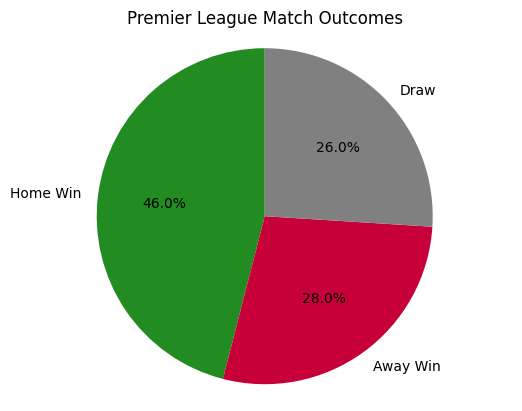

In [ ]:
# Percentage values calculated
outcome_percentages = round(epl['FTR'].value_counts(normalize=True)*100, 0)

# Pie chart labels and values
labels = outcome_percentages.index
values = outcome_percentages.values

# Pie chart colors
colors = ['#228B22', '#C70039', 'grey']

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Premier League Match Outcomes')

# Display the chart
plt.axis('equal')
plt.show()

**Here's a Premier League All time Home Table->**
The team with the most points at home was **Manchester United**. The teams that have accrued the most points when playing at home are Manchester United, Tottenham, Arsenal, Liverpool, and Chelsea.

In [ ]:
epl.pivot_table('point','Home',aggfunc='sum').sort_values('point', ascending =False).head(10)

,point
Home,
Manchester Utd,1559
Tottenham,1519
Arsenal,1517
Liverpool,1501
Chelsea,1485
Everton,1471
Newcastle Utd,1340
Aston Villa,1308
Manchester City,1304


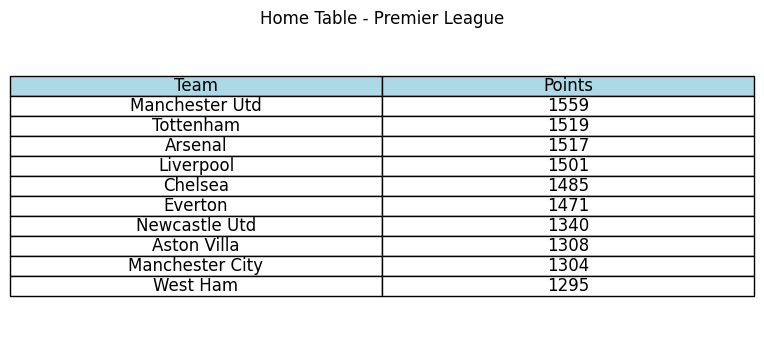

In [ ]:
home_table = epl.pivot_table('point', 'Home', aggfunc='sum').sort_values('point', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 4))

# Adding team names as index
team_names = home_table.index.values.reshape(-1, 1)
table_data = np.hstack((team_names, home_table.values))

# Creating the table
column_labels = ['Team', 'Points']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
table[0, 0].set_facecolor('lightblue')  # 'Team' label
table[0, 1].set_facecolor('lightblue')  # 'Points' label

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Home Table - Premier League')

# Displaying the table
plt.show()

**Here's a Premier League All time Away Table->**
The team with the most points away was **Chelsea**. The teams that have accrued the most points when playing away are Chelsea, Liverpool, Manchester United, Tottenham and Arsenal.

In [ ]:
epl.pivot_table('point','Away',aggfunc='sum').sort_values('point', ascending =False).head(10)

,point
Away,
Chelsea,1495
Liverpool,1485
Manchester Utd,1485
Tottenham,1477
Arsenal,1473
Everton,1435
Newcastle Utd,1320
Aston Villa,1314
West Ham,1287


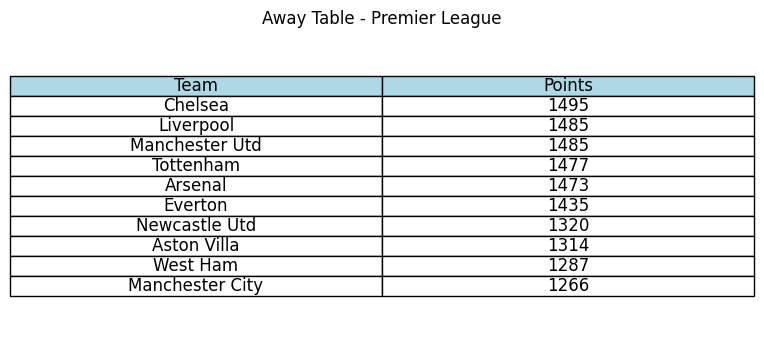

In [ ]:
away_table = epl.pivot_table('point', 'Away', aggfunc='sum').sort_values('point', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 4))

# Adding team names as index
team_names = away_table.index.values.reshape(-1, 1)
table_data = np.hstack((team_names, away_table.values))

# Creating the table
column_labels = ['Team', 'Points']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
table[0, 0].set_facecolor('lightblue')  # 'Team' label
table[0, 1].set_facecolor('lightblue')  # 'Points' label

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Away Table - Premier League')

# Displaying the table
plt.show()

The team with the fewest points when playing at home is **Blackpool**. While the top 5 teams with the lowest home point totals are Blackpool, Swindon Town, Barnsley, Bradford City and Brentford.
**Though Brentford will most likely be out of this list, since they are the only current Premier League club still playing in the league.**

In [ ]:
epl.pivot_table('point','Home',aggfunc='sum').sort_values('point', ascending =True).head(10)

,point
Home,
Blackpool,47
Swindon Town,49
Barnsley,49
Bradford City,84
Brentford,94
Oldham Athletic,98
Huddersfield,98
Cardiff City,100
Reading,147


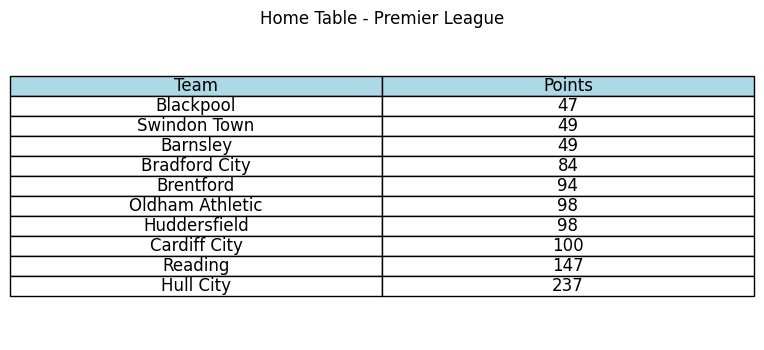

In [ ]:
home_table = epl.pivot_table('point', 'Home', aggfunc='sum').sort_values('point', ascending=True).head(10)

fig, ax = plt.subplots(figsize=(8, 4))

# Adding team names as index
team_names = home_table.index.values.reshape(-1, 1)
table_data = np.hstack((team_names, home_table.values))

# Creating the table
column_labels = ['Team', 'Points']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
table[0, 0].set_facecolor('lightblue')  # 'Team' label
table[0, 1].set_facecolor('lightblue')  # 'Points' label

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Home Table - Premier League')

# Displaying the table
plt.show()

The team that has scored the fewest points playing away from home is **Swindon Town**. while the top 5 teams with the fewest points playing away from home are Swindon Town, Blackpool, Barnsley, Brentford, and Huddersfield.

In [ ]:
epl.pivot_table('point','Away',aggfunc='sum').sort_values('point', ascending =True).head(10)

,point
Away,
Swindon Town,47
Blackpool,49
Barnsley,55
Brentford,92
Huddersfield,96
Cardiff City,102
Bradford City,104
Oldham Athletic,108
Reading,149


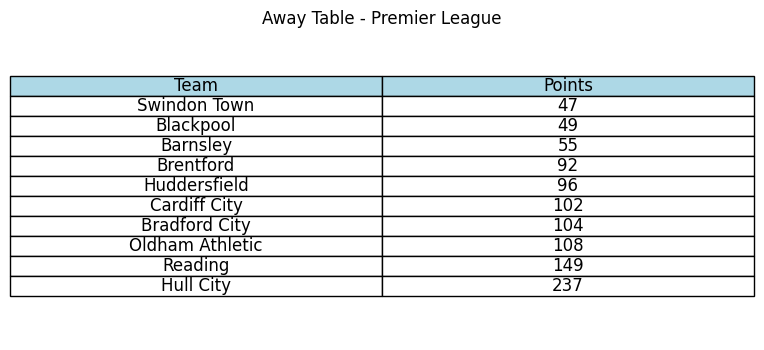

In [ ]:
away_table = epl.pivot_table('point', 'Away', aggfunc='sum').sort_values('point', ascending=True).head(10)

fig, ax = plt.subplots(figsize=(8, 4))

# Adding team names as index
team_names = away_table.index.values.reshape(-1, 1)
table_data = np.hstack((team_names, away_table.values))

# Creating the table
column_labels = ['Team', 'Points']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
table[0, 0].set_facecolor('lightblue')  # 'Team' label
table[0, 1].set_facecolor('lightblue')  # 'Points' label

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Away Table - Premier League')

# Displaying the table
plt.show()

The inaugural epl season in 1992–1993 had the most points ever amassed by all teams. The top 5 seasons with the most points amassed by all teams were 1992/1993, 1994/1995, 1993/1994, 2018/2019, and 2005/2006. There were just three seasons (1992–1993, 1993–1994 and 1994–1955) with more than 1000 total points from all teams. **22 teams competed in the league, which could be the reason for the high points.**

In [ ]:
epl.pivot_table('point','Season_End_Year', aggfunc='sum').sort_values('point', ascending =False).head()

,point
Season_End_Year,
1993,1126
1995,1118
1994,1102
2019,998
2006,986


**Removing the seasons with 22 teams in them, for a fairer outlook->**

In [ ]:
epl2= epl.loc[(epl['Season_End_Year']>=1996)]
epl2.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
1386,1996,1,1995-08-19,Wimbledon,3,2,Bolton,Home Win,3,1
1387,1996,1,1995-08-19,Newcastle Utd,3,0,Coventry City,Home Win,3,3
1388,1996,1,1995-08-19,Manchester City,1,1,Tottenham,Draw,1,0
1389,1996,1,1995-08-19,Aston Villa,3,1,Manchester Utd,Home Win,3,2
1390,1996,1,1995-08-19,Blackburn,1,0,QPR,Home Win,3,1


**Hence the top 5 (38 games) seasons  with the most points amassed by all teams were 2018/19, 2005/06, 2013/14, 2020/21, and 2016/17**

In [ ]:
epl2.pivot_table('point','Season_End_Year', aggfunc='sum').sort_values('point', ascending =False).head()

,point
Season_End_Year,
2019,998
2006,986
2014,984
2021,974
2017,972


**The least amount of points were scored by all teams during the 1996/97** epl season. The seasons in which all epl teams accumulated the fewest points were 1996/1997, 1998/1999, 2010/2011, 2004/2005, and 2003/2004.

In [ ]:
epl.pivot_table('point','Season_End_Year', aggfunc='sum').sort_values('point', ascending =True).head()


,point
Season_End_Year,
1997,902
1999,910
2011,918
2005,920
2004,924


Ipswich Town, Southampton and Bournmouth were the teams that suffered the biggest away defeats in epl history, while Manchester United and Liverpool achieved the heaviest home victories with a 9 goals scored.

In [ ]:
epl[epl['GoalDifference']==epl['GoalDifference'].max()]

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
1246,1995,32,1995-03-04,Manchester Utd,9,0,Ipswich Town,Home Win,3,9
11093,2021,22,2021-02-02,Manchester Utd,9,0,Southampton,Home Win,3,9
11681,2023,4,2022-08-27,Liverpool,9,0,Bournemouth,Home Win,3,9


In [ ]:
epl[epl['HomeGoals']==epl['HomeGoals'].max()].sort_values('GoalDifference', ascending =False).tail()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
1246,1995,32,1995-03-04,Manchester Utd,9,0,Ipswich Town,Home Win,3,9
11093,2021,22,2021-02-02,Manchester Utd,9,0,Southampton,Home Win,3,9
11681,2023,4,2022-08-27,Liverpool,9,0,Bournemouth,Home Win,3,9
6832,2010,13,2009-11-22,Tottenham,9,1,Wigan Athletic,Home Win,3,8


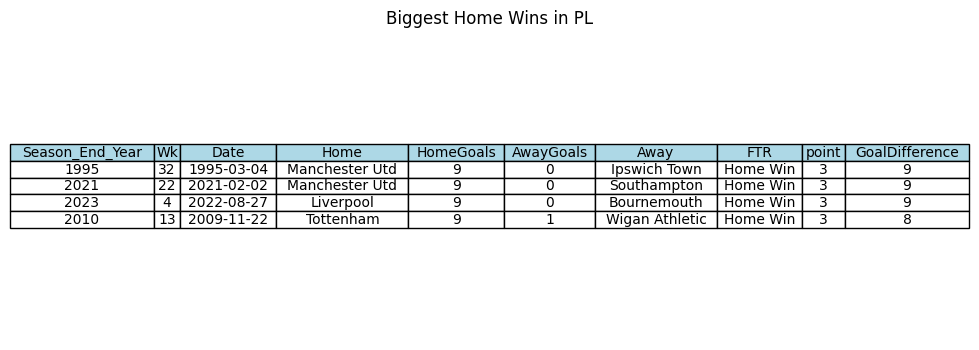

In [ ]:
subset = epl[epl['HomeGoals'] == epl['HomeGoals'].max()].sort_values('GoalDifference', ascending=False).tail()

fig, ax = plt.subplots(figsize=(8, 4))

# Creating the table
column_labels = list(subset.columns)  # Using column names as labels
table = plt.table(cellText=subset.values, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
for i in range(len(column_labels)):
    table[0, i].set_facecolor('lightblue')

# Styling the table
table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # Adjust column widths based on content
table.auto_set_font_size(False)
table.set_fontsize(10)  # Decrease font size to fit data within cells

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Biggest Home Wins in PL')

# Displaying the table
plt.show()

In [ ]:
epl[epl['AwayGoals']==epl['AwayGoals'].max()].sort_values('GoalDifference', ascending =False).tail()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
10596,2020,10,2019-10-25,Southampton,0,9,Leicester City,Away Win,3,-9


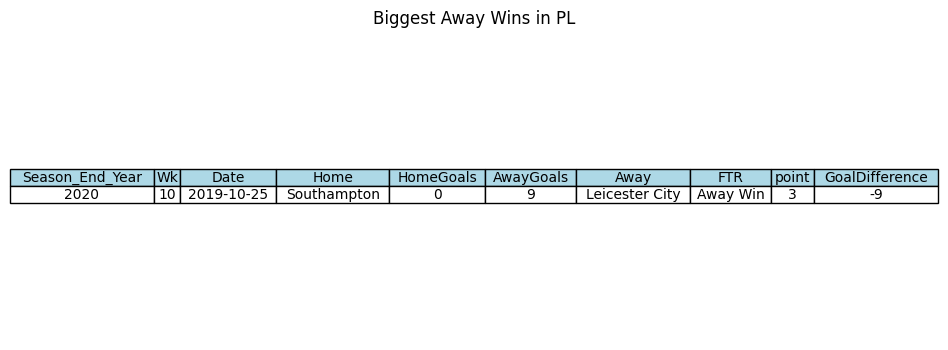

In [ ]:
subset = epl[epl['AwayGoals'] == epl['AwayGoals'].max()].sort_values('GoalDifference', ascending=False).tail()

fig, ax = plt.subplots(figsize=(8, 4))

# Creating the table
column_labels = list(subset.columns)  # Using column names as labels
table = plt.table(cellText=subset.values, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
for i in range(len(column_labels)):
    table[0, i].set_facecolor('lightblue')

# Adjusting cell width and font size
table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # Adjust column widths based on content
table.auto_set_font_size(False)
table.set_fontsize(10)  # Decrease font size to fit data within cells

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Biggest Away Wins in PL')

# Displaying the table
plt.show()

In the history of the English Premier League, teams that played at home gathered 16005 (55%) points, while those that played away from home impressively amassed 9903 (34%) points. Matches that were drawn accrued 3010 (10)% of the total points. This supports the idea of home team advantage.

In [ ]:
epl.pivot_table('point','FTR', aggfunc=sum).sort_values('point', ascending =False)


,point
FTR,
Home Win,16557
Away Win,10230
Draw,3097


In [ ]:
round(epl.pivot_table('point','FTR', aggfunc=sum).div(sum(epl['point'])).mul(100).sort_values('point', ascending =False))


,point
FTR,
Home Win,55.0
Away Win,34.0
Draw,10.0


**Now let us examine the data frame for 2012 and so on.**

In [ ]:
epl3= epl.loc[(epl['Season_End_Year']>=2012)]
epl3.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
7466,2012,1,2011-08-13,QPR,0,4,Bolton,Away Win,3,-4
7467,2012,1,2011-08-13,Blackburn,1,2,Wolves,Away Win,3,-1
7468,2012,1,2011-08-13,Fulham,0,0,Aston Villa,Draw,1,0
7469,2012,1,2011-08-13,Wigan Athletic,1,1,Norwich City,Draw,1,0
7470,2012,1,2011-08-13,Newcastle Utd,0,0,Arsenal,Draw,1,0


***Since 2012, Manchester City have collected most points in home matches which was not the case earlier. One reason may be the investments of Saudi Money.***

In [ ]:
epl3.pivot_table('point','Home', aggfunc='sum').sort_values('point', ascending =False).head()

,point
Home,
Manchester City,632
Tottenham,612
Arsenal,592
Manchester Utd,586
Everton,580


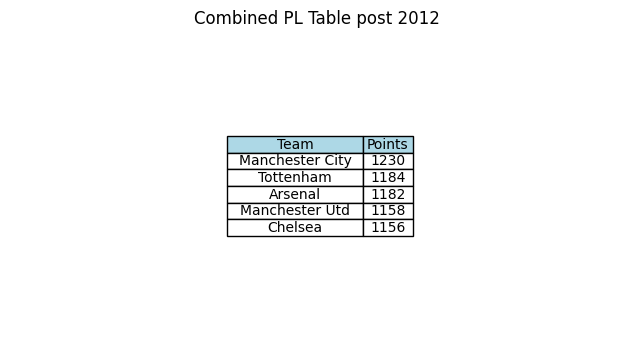

In [ ]:
home_table = epl3.pivot_table('point', 'Home', aggfunc='sum')
away_table = epl3.pivot_table('point', 'Away', aggfunc='sum')

# Combine home and away tables
combined_table = home_table.add(away_table, fill_value=0)
combined_table = combined_table.sort_values('point', ascending=False).head()

fig, ax = plt.subplots(figsize=(8, 4))

# Adding team names as index
team_names = combined_table.index.values.reshape(-1, 1)
table_data = np.hstack((team_names, combined_table.values))

# Creating the table
column_labels = ['Team', 'Points']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Highlighting the column labels
for i in range(len(column_labels)):
    table[0, i].set_facecolor('lightblue')

# Adjusting cell width and font size
table.auto_set_column_width([0, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)  # Decrease font size to fit data within cells

# Removing the axis
ax.axis('off')

# Adding a title
plt.title('Combined PL Table post 2012 ')

# Displaying the table
plt.show()

The most points were dropped by **Everton** while at home.

In [ ]:
Home=epl.pivot_table('point','Home',columns='FTR',aggfunc=sum).sort_values('Home Win', ascending =False)
rem=Home.drop(['Draw','Home Win'],axis=1)
rem.rename(columns={'Away Win':'Lost Home Points'}).sort_values('Lost Home Points', ascending =False).head()

FTR,Lost Home Points
Home,
Everton,495
West Ham,495
Aston Villa,495
Southampton,459
Tottenham,417


In the history of the EPL, **Everton** lost the most points when playing away.



In [ ]:
Away=epl.pivot_table('point','Away',columns='FTR',aggfunc=sum).sort_values('Away Win', ascending =False)
rem=Away.drop(['Draw','Away Win'],axis=1)
rem.rename(columns={'Home Win':'Lost Away Points'}).sort_values('Lost Away Points', ascending =False).head()

FTR,Lost Away Points
Away,
Everton,801
West Ham,789
Newcastle Utd,765
Tottenham,732
Southampton,729


**Manchester City have the most points scored in a season that is 100 in 2018**

In [ ]:
Away=epl.pivot_table('point',['Season_End_Year','Away'],columns='FTR',aggfunc=sum)
rem=Away.drop(['Home Win'],axis=1)
rem['Total_Away_Point']=Away['Draw']+Away['Away Win']
rem['Total_Home_Point']=Home['Draw']+Home['Home Win']
rem['Total_Point']=rem['Total_Away_Point']+rem['Total_Home_Point']
rem.sort_values('Total_Point', ascending =False).head(40)

FTR                              Away Win  Draw  Total_Away_Point  \
Season_End_Year Away                                                
1993            Arsenal              21.0   5.0              26.0   
                Aston Villa          24.0   6.0              30.0   
                Blackburn            21.0   7.0              28.0   
                Chelsea              15.0   7.0              22.0   
                Coventry City        18.0   9.0              27.0   
                Crystal Palace       15.0   7.0              22.0   
                Everton              24.0   2.0              26.0   
                Ipswich Town         12.0   7.0              19.0   
                Leeds United          NaN   7.0               NaN   
                Liverpool             9.0   7.0              16.0   
                Manchester City      24.0   4.0              28.0   
                Manchester Utd       30.0   7.0              37.0   
                Middlesbrough         9.0   6.0              15.0   
                Norwich City         24.0   3.0              27.0   
                Nott'ham Forest      12.0   6.0              18.0   
                Oldham Athletic       9.0   4.0              13.0   
                QPR                  18.0   7.0              25.0   
                Sheffield Utd        12.0   4.0              16.0   
                Sheffield Weds       18.0   6.0              24.0   
                Southampton           9.0   5.0              14.0   
                Tottenham            15.0   6.0              21.0   
                Wimbledon            15.0   8.0              23.0   
1994            Arsenal              24.0   9.0              33.0   
                Aston Villa          21.0   7.0              28.0   
                Blackburn            33.0   4.0              37.0   
                Chelsea               6.0   7.0              13.0   
                Coventry City        15.0   7.0              22.0   
                Everton              12.0   4.0              16.0   
                Ipswich Town         12.0   8.0              20.0   
                Leeds United         15.0  10.0              25.0   
                Liverpool            15.0   5.0              20.0   
                Manchester City       9.0   8.0              17.0   
                Manchester Utd       39.0   5.0              44.0   
                Newcastle Utd        27.0   4.0              31.0   
                Norwich City         24.0   8.0              32.0   
                Oldham Athletic      12.0   5.0              17.0   
                QPR                  24.0   5.0              29.0   
                Sheffield Utd         6.0   8.0              14.0   
                Sheffield Weds       18.0   9.0              27.0   
                Southampton           9.0   5.0              14.0   

FTR                              Total_Home_Point  Total_Point  
Season_End_Year Away                                            
1993            Arsenal                       NaN          NaN  
                Aston Villa                   NaN          NaN  
                Blackburn                     NaN          NaN  
                Chelsea                       NaN          NaN  
                Coventry City                 NaN          NaN  
                Crystal Palace                NaN          NaN  
                Everton                       NaN          NaN  
                Ipswich Town                  NaN          NaN  
                Leeds United                  NaN          NaN  
                Liverpool                     NaN          NaN  
                Manchester City               NaN          NaN  
                Manchester Utd                NaN          NaN  
                Middlesbrough                 NaN          NaN  
                Norwich City                  NaN          NaN  
                Nott'ham Forest               NaN          Na

Total points amassed by team playing at home in the epl by season. Playing at home over different seasons, Liverpool, Chelsea, Manchester United, and Manchester City all amassed 55 points, which is the highest points earned by any team playing at home.

In [ ]:
Home=epl.pivot_table('point',['Season_End_Year','Home'],columns='FTR',aggfunc=sum)
rem=Home.drop(['Away Win'],axis=1)
rem['Total_Home_Point']=Home['Draw']+Home['Home Win']
rem.sort_values('Total_Home_Point', ascending =False).head(40)

,FTR,Draw,Home Win,Total_Home_Point
Season_End_Year,Home,,,
2020,Liverpool,1.0,54.0,55.0
2006,Chelsea,1.0,54.0,55.0
2011,Manchester Utd,1.0,54.0,55.0
2012,Manchester City,1.0,54.0,55.0
2019,Liverpool,2.0,51.0,53.0
1995,Blackburn,2.0,51.0,53.0
2017,Tottenham,2.0,51.0,53.0
1996,Newcastle Utd,1.0,51.0,52.0
2010,Chelsea,1.0,51.0,52.0


Total points amassed by team playing at away in the epl by season. Machester city had the highest points (50) playing away in the 2017/2018 season.


In [ ]:
Away=epl.pivot_table('point',['Season_End_Year','Away'],columns='FTR',aggfunc=sum)
rem=Away.drop(['Home Win'],axis=1)
rem['Total_Away_Point']=Away['Draw']+Away['Away Win']
rem.sort_values('Total_Away_Point', ascending =False).head(40)

,FTR,Away Win,Draw,Total_Away_Point
Season_End_Year,Away,,,
2018,Manchester City,48.0,2.0,50.0
2005,Chelsea,45.0,3.0,48.0
2002,Arsenal,42.0,5.0,47.0
2022,Manchester City,42.0,4.0,46.0
2021,Manchester City,42.0,3.0,45.0
2020,Liverpool,42.0,2.0,44.0
2019,Liverpool,39.0,5.0,44.0
1994,Manchester Utd,39.0,5.0,44.0
2009,Chelsea,42.0,2.0,44.0


In the history of the EPL, the most goals (723) at home in a single season was during the 1992–1993 season. Although, the number of games played were 462 among 22 teams. With 380 games played, the 2009–2010 season has the most goals (645) scored at home since the epl structure changed to 20 teams.

In [ ]:
epl.pivot_table('HomeGoals','Season_End_Year',aggfunc=sum).sort_values('HomeGoals', ascending =False).head(6)

,HomeGoals
Season_End_Year,
1993,723
1995,697
1994,663
2010,645
2000,635
2023,621


In the history of the English Premier League, the most away goals scored were 532 during the 1993–1994 season. However, the 2020–2021 season, which included 380 games, saw the most away goals (510) since the epl structure moved to 20 teams.

In [ ]:
epl.pivot_table('AwayGoals','Season_End_Year',aggfunc=sum).sort_values('AwayGoals', ascending =False).head(6)


,AwayGoals
Season_End_Year,
1994,532
2021,510
1993,499
1995,498
2022,496
2019,476


Home teams scored 6 out of every 10 epl goals.

Away teams scored 4 out of every 10 epl goals.

Teams playing at home have scored 18332 goals in the history of the epl.

Teams playing away from home have scored 13740 goals in the history of the epl.

In [ ]:
Home=epl['HomeGoals'].sum()
away=epl['AwayGoals'].sum()
Total_Goals = Home + away
Home_Goals=round(Home/Total_Goals*10)
away_Goals=round(away/Total_Goals*10)
print(Home_Goals)
print(away_Goals)
print(Home)
print(away)

6
4
18332
13740


Manchester United have been the Superier Club in the PL overall winning 13 titles.
In the Recent years the PL is being dominated by Manchester City whereas their fellow Manchester has found it difficult

**Analysing the Manchester Derby**

In [ ]:
epl4 = epl.loc[(epl['Home']=='Manchester City')&(epl['Away']=='Manchester Utd')&(epl['FTR']=='Home Win')]

In [ ]:
epl4.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
4166,2003,13,2002-11-09,Manchester City,3,1,Manchester Utd,Home Win,3,2
4702,2004,28,2004-03-14,Manchester City,4,1,Manchester Utd,Home Win,3,3
5391,2006,22,2006-01-14,Manchester City,3,1,Manchester Utd,Home Win,3,2
5970,2008,3,2007-08-19,Manchester City,1,0,Manchester Utd,Home Win,3,1
7821,2012,36,2012-04-30,Manchester City,1,0,Manchester Utd,Home Win,3,1


In [ ]:
epl4.value_counts()

Season_End_Year  Wk  Date        Home             HomeGoals  AwayGoals  Away            FTR       point  GoalDifference
2003             13  2002-11-09  Manchester City  3          1          Manchester Utd  Home Win  3      2                 1
2004             28  2004-03-14  Manchester City  4          1          Manchester Utd  Home Win  3      3                 1
2006             22  2006-01-14  Manchester City  3          1          Manchester Utd  Home Win  3      2                 1
2008             3   2007-08-19  Manchester City  1          0          Manchester Utd  Home Win  3      1                 1
2012             36  2012-04-30  Manchester City  1          0          Manchester Utd  Home Win  3      1                 1
2014             5   2013-09-22  Manchester City  4          1          Manchester Utd  Home Win  3      3                 1
2015             10  2014-11-02  Manchester City  1          0          Manchester Utd  Home Win  3      1                 1
2019 

In [ ]:
epl5 = epl.loc[(epl['Away']=='Manchester City')&(epl['Home']=='Manchester Utd')&(epl['FTR']=='Away Win')]


In [ ]:
epl5.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
6202,2008,26,2008-02-10,Manchester Utd,1,2,Manchester City,Away Win,3,-1
7550,2012,9,2011-10-23,Manchester Utd,1,6,Manchester City,Away Win,3,-5
8161,2013,32,2013-04-08,Manchester Utd,1,2,Manchester City,Away Win,3,-1
8527,2014,28,2014-03-25,Manchester Utd,0,3,Manchester City,Away Win,3,-3
9396,2017,4,2016-09-10,Manchester Utd,1,2,Manchester City,Away Win,3,-1


In [ ]:
epl5.value_counts()

Season_End_Year  Wk  Date        Home            HomeGoals  AwayGoals  Away             FTR       point  GoalDifference
2008             26  2008-02-10  Manchester Utd  1          2          Manchester City  Away Win  3      -1                1
2012             9   2011-10-23  Manchester Utd  1          6          Manchester City  Away Win  3      -5                1
2013             32  2013-04-08  Manchester Utd  1          2          Manchester City  Away Win  3      -1                1
2014             28  2014-03-25  Manchester Utd  0          3          Manchester City  Away Win  3      -3                1
2017             4   2016-09-10  Manchester Utd  1          2          Manchester City  Away Win  3      -1                1
2018             16  2017-12-10  Manchester Utd  1          2          Manchester City  Away Win  3      -1                1
2019             31  2019-04-24  Manchester Utd  0          2          Manchester City  Away Win  3      -2                1
2022 

In [ ]:
epl6 = epl.loc[(epl['Away']=='Manchester City')&(epl['Home']=='Manchester Utd')&(epl['FTR']=='Home Win')]

In [ ]:
epl6.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
196,1993,18,1992-12-06,Manchester Utd,2,1,Manchester City,Home Win,3,1
887,1994,40,1994-04-23,Manchester Utd,2,0,Manchester City,Home Win,3,2
1075,1995,13,1994-11-10,Manchester Utd,5,0,Manchester City,Home Win,3,5
1467,1996,9,1995-10-14,Manchester Utd,1,0,Manchester City,Home Win,3,1
4582,2004,16,2003-12-13,Manchester Utd,3,1,Manchester City,Home Win,3,2


In [ ]:
epl6.value_counts()

Season_End_Year  Wk  Date        Home            HomeGoals  AwayGoals  Away             FTR       point  GoalDifference
1993             18  1992-12-06  Manchester Utd  2          1          Manchester City  Home Win  3      1                 1
1994             40  1994-04-23  Manchester Utd  2          0          Manchester City  Home Win  3      2                 1
1995             13  1994-11-10  Manchester Utd  5          0          Manchester City  Home Win  3      5                 1
1996             9   1995-10-14  Manchester Utd  1          0          Manchester City  Home Win  3      1                 1
2004             16  2003-12-13  Manchester Utd  3          1          Manchester City  Home Win  3      2                 1
2007             17  2006-12-09  Manchester Utd  3          1          Manchester City  Home Win  3      2                 1
2009             36  2009-05-10  Manchester Utd  2          0          Manchester City  Home Win  3      2                 1
2010 

In [ ]:
epl7 = epl.loc[(epl['Home']=='Manchester City')&(epl['Away']=='Manchester Utd')&(epl['FTR']=='Away Win')]

In [ ]:
epl7.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,point,GoalDifference
614,1994,14,1993-11-07,Manchester City,2,3,Manchester Utd,Away Win,3,-1
1217,1995,28,1995-02-11,Manchester City,0,3,Manchester Utd,Away Win,3,-3
1714,1996,34,1996-04-06,Manchester City,2,3,Manchester Utd,Away Win,3,-1
3419,2001,14,2000-11-18,Manchester City,0,1,Manchester Utd,Away Win,3,-1
5071,2005,27,2005-02-13,Manchester City,0,2,Manchester Utd,Away Win,3,-2


In [ ]:
epl7.value_counts()

Season_End_Year  Wk  Date        Home             HomeGoals  AwayGoals  Away            FTR       point  GoalDifference
1994             14  1993-11-07  Manchester City  2          3          Manchester Utd  Away Win  3      -1                1
1995             28  1995-02-11  Manchester City  0          3          Manchester Utd  Away Win  3      -3                1
1996             34  1996-04-06  Manchester City  2          3          Manchester Utd  Away Win  3      -1                1
2001             14  2000-11-18  Manchester City  0          1          Manchester Utd  Away Win  3      -1                1
2005             27  2005-02-13  Manchester City  0          2          Manchester Utd  Away Win  3      -2                1
2007             37  2007-05-05  Manchester City  0          1          Manchester Utd  Away Win  3      -1                1
2009             15  2008-11-30  Manchester City  0          1          Manchester Utd  Away Win  3      -1                1
2010 

### We can see that United have won a total of 25 derbies till the season 2022-23 with their latest coming at Old Trafford in 2023. While Manchester City won a total of 18 derbies till 2022-23 with their latest coming at The Etihad in 2023.

### In conclusion, United have won the derby more with City responding well in the recent years.

## **Premier League Transfers (1992/93-2021/22)**

**Dataset from www.transfermarkt.com**

In [ ]:
df = pd.read_csv('/content/premier-league.csv')
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           22975 non-null  object 
 1   player_name         22975 non-null  object 
 2   age                 22960 non-null  float64
 3   position            22975 non-null  object 
 4   club_involved_name  22975 non-null  object 
 5   fee                 22971 non-null  object 
 6   transfer_movement   22975 non-null  object 
 7   transfer_period     22975 non-null  object 
 8   fee_cleaned         8739 non-null   float64
 9   league_name         22975 non-null  object 
 10  year                22975 non-null  int64  
 11  season              22975 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

club_name                 0
player_name               0
age                      15
position                  0
club_involved_name        0
fee                       4
transfer_movement         0
transfer_period           0
fee_cleaned           14236
league_name               0
year                      0
season                    0
dtype: int64

**NaN Values exist in Age and fee_cleaned Columns.**
fee_cleaned may be NULL incase of a free transfer, loan transfer, direct swap deal or just promotion from youth team into the first team

In [ ]:
df = df.rename(columns={'club_name' : 'joined' , 'club_involved_name' : 'left'})
df['club'] = df.joined
df.joined = np.where(df.transfer_movement == 'out', df.left , df.joined)
df.left = np.where(df.transfer_movement == 'out', df.club , df.left)

In [ ]:
df.sample(10)

,joined,player_name,age,position,left,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,club
11811,Bay. Leverkusen,Sami Hyypiä,35.0,Centre-Back,Liverpool FC,free transfer,out,Summer,0.000,Premier League,2009,2009/2010,Liverpool FC
21946,Manchester United,Alexis Sánchez,31.0,Centre-Forward,Inter,"End of loanAug 31, 2020",in,Summer,NaN,Premier League,2020,2020/2021,Manchester United
15075,Norwich City,Alexander Tettey,26.0,Defensive Midfield,Stade Rennais,€1.50m,in,Summer,1.500,Premier League,2012,2012/2013,Norwich City
276,Middlesbrough FC,Dwight Marshall,27.0,attack,Plymouth,loan transfer,in,Winter,NaN,Premier League,1992,1992/1993,Middlesbrough FC
17382,Crystal Palace,Michael Chambers,20.0,Centre-Back,Welling Utd.,"End of loanNov 23, 2014",in,Winter,NaN,Premier League,2014,2014/2015,Crystal Palace
20405,AFC Bournemouth,Marc Pugh,32.0,Left Winger,Hull City,"End of loanMay 31, 2019",in,Summer,NaN,Premier League,2018,2018/2019,AFC Bournemouth
16538,Hull City,Eldin Jakupovic,29.0,Goalkeeper,Leyton Orient,"End of loanJan 29, 2014",in,Winter,NaN,Premier League,2013,2013/2014,Hull City
3358,Preston,Adam Eaton,19.0,defence,Everton FC,€6Th.,out,Summer,0.006,Premier League,1998,1998/1999,Everton FC
21533,Brighton & Hove Albion,Tariq Lamptey,19.0,Right-Back,Chelsea U23,€1.20m,in,Winter,1.200,Premier League,2019,2019/2020,Brighton & Hove Albion
15964,Spurs,Lewis Holtby,23.0,Central Midfield,Fulham FC,"End of loanMay 31, 2014",out,Summer,NaN,Premier League,2013,2013/2014,Fulham FC


In [ ]:
df[df.joined.str.contains(' U')]['joined'].unique()

array(['Southend United', 'Carlisle United', 'Cambridge Utd.',
       'Manchester United', 'Scunthorpe Utd.', 'Leeds United',
       'Sheffield United', 'Hereford Utd.', 'Man Utd', 'Oxford United',
       'Welling Utd.', 'Newcastle United', 'Colchester Utd.',
       'West Ham United', 'Sheff Utd', 'Dundee United', 'Boston Utd',
       'D.C. United', 'Sydney United', 'Aylesbury Utd.', 'Ayr United',
       'SuperSport Utd.', 'Waterford Utd', 'Central United',
       'Tampere United', 'Spennymoor United', 'Bluebell United',
       'Drogheda United', 'Bolton U23', 'Incheon Utd.', 'Man Utd Res.',
       'Tigres UANL', 'Portsmouth U21', 'Ashton United',
       'Hinckley United', 'Le Mans UC 72', 'WP United', 'Adelaide United',
       'Sampdoria U19', 'Sutton Utd', 'Telford Utd', 'Gold Coast Utd.',
       'Juventus U19', 'Ajax U21', 'Angered United', 'Stoke U21',
       'Airbus UK', 'FC United', 'FC Utrecht', 'Man Utd U21',
       'Chelsea U23', 'Derby U23', 'Man Utd U23'], dtype=object)

In [ ]:
df.joined = df.joined.str.replace(' FC', '', regex=True)
df.left = df.left.str.replace(' FC', '', regex=True)

In [ ]:
df.shape

(22975, 13)

In [ ]:
df.joined.replace({'Manchester United' : 'Man Utd' , 'Manchester City' : 'Man City'}, inplace=True)
df.left.replace({'Manchester United' : 'Man Utd' , 'Manchester City' : 'Man City'}, inplace=True)

**For our analysis we are removing transfers from youth teams into the first team**

In [ ]:
df= df[~df.joined.str.contains('U19')]
df= df[~df.joined.str.contains('U21')]
df= df[~df.joined.str.contains('U23')]
df= df[~df.joined.str.contains(' Res')]

In [ ]:
df.shape

(22952, 13)

Since only 15 entries are missing the age column, we fill these missing entries with the mean age

In [ ]:
df.age = df.age.fillna(df.age.mean())
df.age = df.age.astype(int)

We need more investigation about fee_cleaned because maybe player had transferred free or exchange deal(- , ?).
We will check the unknown status in https://www.transfermarkt.com to check what happened with these players


In [ ]:
fee = df[df.fee_cleaned.isnull()]
fee.fee.unique()

array(['?', '-', 'loan transfer', ..., 'End of loanApr 26, 2022',
       'End of loanFeb 2, 2022', 'End of loanJan 19, 2022'], dtype=object)

In [ ]:
fee = fee[fee.fee.isin(['-','?'])]
fee.sample(10)

,joined,player_name,age,position,left,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,club
4803,Southampton,Dan Petrescu,33,Right-Back,Bradford City,?,out,Winter,NaN,Premier League,2000,2000/2001,Bradford City
96,Nottingham Forest,Steve Blatherwick,18,Centre-Back,Notts County,?,in,Summer,NaN,Premier League,1992,1992/1993,Nottingham Forest
2570,Brisbane Strikers,Chris Zoricich,28,defence,Chelsea,?,out,Summer,NaN,Premier League,1997,1997/1998,Chelsea FC
8332,Middlesbrough,Andrew Taylor,18,Left-Back,Boro U18,-,in,Summer,NaN,Premier League,2005,2005/2006,Middlesbrough FC
20921,Liverpool,Nathaniel Phillips,22,Centre-Back,Liverpool U23,-,in,Summer,NaN,Premier League,2019,2019/2020,Liverpool FC
13975,Everton,John Lundstram,17,Central Midfield,Everton U18,-,in,Summer,NaN,Premier League,2011,2011/2012,Everton FC
14003,Liverpool,Lewis Hatch,17,Central Midfield,Liverpool U18,-,in,Summer,NaN,Premier League,2011,2011/2012,Liverpool FC
3731,FC Ashdod,Alon Hazan,31,Central Midfield,Watford,?,out,Summer,NaN,Premier League,1999,1999/2000,Watford FC
6634,Middlesbrough,Ross Turnbull,18,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,2003,2003/2004,Middlesbrough FC
7467,Aston Villa,Gary Cahill,18,Centre-Back,Aston Villa U18,-,in,Summer,NaN,Premier League,2004,2004/2005,Aston Villa


After checking some players status in https://www.transfermarkt.com , we found that they are transferred for free, so we will fill Nan values of fee_cleaned with 0.0

In [ ]:
df.fee_cleaned = df.fee_cleaned.fillna(0)

In [ ]:
df.isnull().sum()

joined               0
player_name          0
age                  0
position             0
left                 0
fee                  4
transfer_movement    0
transfer_period      0
fee_cleaned          0
league_name          0
year                 0
season               0
club                 0
dtype: int64

In [ ]:
df = df[['year' , 'player_name', 'position', 'age', 'left', 'joined', 'fee', 'fee_cleaned', 'transfer_period']] # removing unnecessar columns

In [ ]:
df = df.drop_duplicates() # drop duplicated columns
df.shape

(22446, 9)

In [ ]:
# Create Function for measure the distribution of the columns that you need
def get_count(col, title, top):
    if top == 0:
        d = pd.DataFrame(df[col].value_counts())
    else:
         d = pd.DataFrame(df[col].value_counts().head(top))
    d = d.reset_index()
    d = d.rename(columns={'index' : col , col : 'count'})
    d.sort_values('count', ascending=False)
    return px.bar(data_frame=d, x= col, y='count' , title= title, text_auto=True)

**Chelsea** had the most number of players transfered IN followed by Tottenham, Man City, Liverpool and West Ham

In [ ]:
get_count('joined', 'Top 20 Clubs transfering',20)

In [ ]:
# Group the data byjoined club name and calculate the total spending
club_spending = df.groupby('joined')['fee_cleaned'].sum()

# Sort the clubs based on their total spending in descending order
highest_spending_clubs = club_spending.sort_values(ascending=False)

# Select the top 10 highest spending clubs
top_10_clubs = highest_spending_clubs.head(10)

# Create a bar graph using Plotly Express
fig = px.bar(x=top_10_clubs.index, y=top_10_clubs.values,
             labels={'x': 'Club', 'y': 'Total Spending (in EUR millions)'},
             title='Top 10 Highest Spending Clubs in the Transfer Market')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the interactive bar graph
fig.show()

**Premier League Clubs like doing their business in the Summer Transfer Window with 2/3rd of the transfers made compared to a third in the winters.**

In [ ]:
# Group the data by transfer_period and count the number of transfers
transfer_counts = df['transfer_period'].value_counts()


# Create a pie chart using Plotly Express
fig = px.pie(values=transfer_counts.values, names=transfer_counts.index,
             title='Summer Transfers vs Winter Transfers')

# Show the pie chart
fig.show()

**David Button** is the most transferred around player in the Premier League with 28 transfers (most of them being LOAN deals) followed by Danny Graham, Jermaine Pennant and David Bentley

In [ ]:
get_count('player_name' , 'Top 20 Players Transferred' , 20)

In [ ]:
px.box(data_frame=df, x='age', title="Players' Ages")

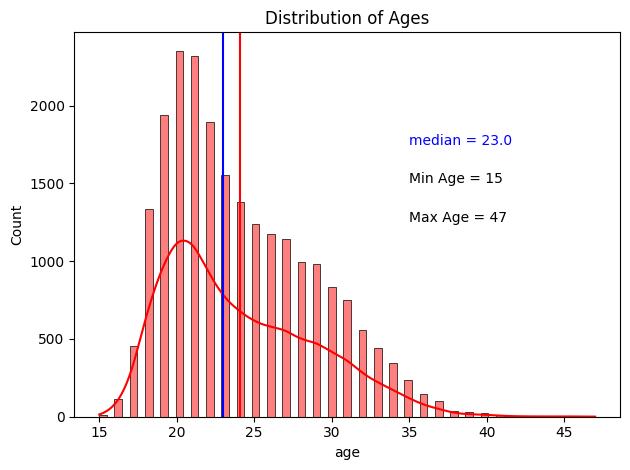

In [ ]:
sns.histplot(data=df, x='age', kde=True, color='red')
plt.axvline(df.age.mean() , c='r')
plt.axvline(df.age.median() , c='b')
plt.text(35,1750, 'median = {}'.format(df.age.median()), c='b')
plt.text(35,1500, 'Min Age = {}'.format(df.age.min()))
plt.text(35,1250, 'Max Age = {}'.format(df.age.max()))
plt.title('Distribution of Ages')
plt.tight_layout();

**I know you guys must be thinking who's the 47 year old that's still getting transferred...Well let's see**

In [ ]:
fig = px.scatter(data_frame = df.groupby('player_name' , as_index=False)['age'].max().sort_values('age', ascending=False).head(10), x='player_name', y='age')
# plt.xticks(rotation=60)
fig.update_layout(title = 'The oldest players in Premier League\n')
# plt.tight_layout();

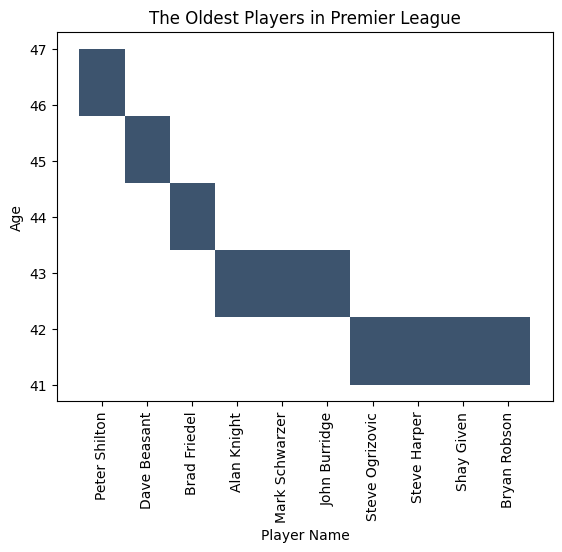

In [ ]:
df_oldest_players = df.groupby('player_name', as_index=False)['age'].max().sort_values('age', ascending=False).head(10)

sns.histplot(data=df_oldest_players, y='age', x='player_name', kde=True)
plt.title('The Oldest Players in Premier League')
plt.xlabel('Player Name')
plt.ylabel('Age')

plt.xticks(rotation=90)

plt.show()

In [ ]:
# Full info about the oldest players
oldest_players = ['Peter Shilton' , 'Dave Beasant' , 'Brad Friedel' ,'Alan Knight', 'John Burridge' , 'Mark Schwarzer', 'Steve Ogrizovic', 'Steve Harper', 'Shay Given', 'Bryan Robson']
oldest_players = df[df.player_name.isin(oldest_players)]
oldest_players.loc[oldest_players.groupby(['player_name'])['age'].idxmax()]

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
7709,2004,Alan Knight,Goalkeeper,43,Portsmouth,Retired,-,0.0,Summer
17795,2015,Brad Friedel,Goalkeeper,44,Tottenham Hotspur,Retired,-,0.0,Summer
3181,1998,Bryan Robson,Central Midfield,41,Middlesbrough,Retired,-,0.0,Summer
7579,2004,Dave Beasant,Goalkeeper,45,Fulham,Retired,-,0.0,Summer
1290,1994,John Burridge,Goalkeeper,43,Falkirk,Man City,free transfer,0.0,Winter
18595,2016,Mark Schwarzer,Goalkeeper,43,Leicester City,Retired,-,0.0,Summer
2316,1996,Peter Shilton,Goalkeeper,47,West Ham United,Leyton Orient,free transfer,0.0,Winter
19700,2017,Shay Given,Goalkeeper,41,Stoke City,Retired,-,0.0,Summer
19053,2016,Steve Harper,Goalkeeper,41,Sunderland AFC,Retired,-,0.0,Summer
4425,2000,Steve Ogrizovic,Goalkeeper,42,Coventry City,Retired,-,0.0,Summer


We notice that all of these players apart from Sir Bryan Robson are Goalkeepers. So doing the same for outfield players

In [ ]:
fig = px.scatter(data_frame = df[df.position != 'Goalkeeper'].groupby('player_name' , as_index=False)['age'].max().sort_values('age', ascending=False).head(10), x='player_name', y='age')
# plt.xticks(rotation=60)
fig.update_layout(title = 'The oldest players in Premier League Not goalkeepers\n')
# plt.tight_layout();

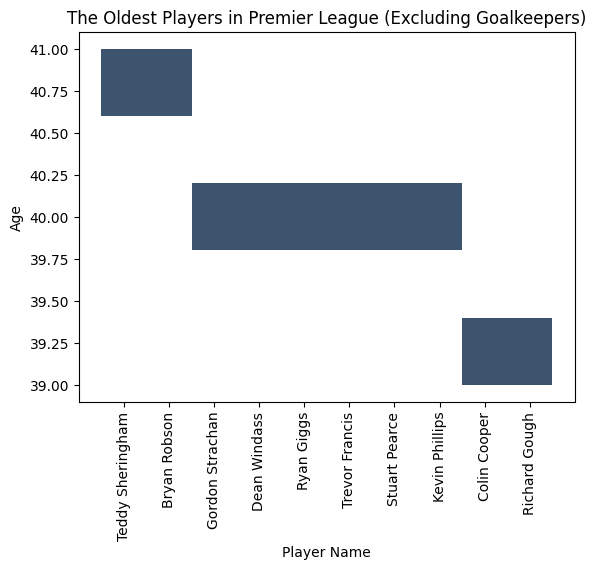

In [ ]:
df_oldest_players = df[df.position != 'Goalkeeper'].groupby('player_name', as_index=False)['age'].max().sort_values('age', ascending=False).head(10)

sns.histplot(data=df_oldest_players, x='player_name', y='age', kde=True)
plt.title('The Oldest Players in Premier League (Excluding Goalkeepers)')
plt.xlabel('Player Name')
plt.ylabel('Age')

plt.xticks(rotation=90)

plt.show()

In [ ]:
# Full info about The oldest players in Premier League Not goalkeepers
oldest_players = ['Bryan Robson' , 'Teddy Sheringham' , 'Stuart Pearce' , 'Ryan Giggs' , 'Trevor Francis', 'Gordon Strachan', 'Dean Windass', 'Kevin Phillips', 'Colin Cooper', 'Richard Gough']
oldest_players = df[df.player_name.isin(oldest_players)]
oldest_players.loc[oldest_players.groupby(['player_name'])['age'].idxmax()]

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
3181,1998,Bryan Robson,Central Midfield,41,Middlesbrough,Retired,-,0.0,Summer
9216,2006,Colin Cooper,Left-Back,39,Middlesbrough,Retired,-,0.0,Summer
11439,2008,Dean Windass,Centre-Forward,40,Oldham Athletic,Hull City,"End of loanMay 1, 2009",0.0,Summer
2483,1997,Gordon Strachan,Central Midfield,40,Coventry City,Retired,-,0.0,Summer
16567,2013,Kevin Phillips,Centre-Forward,40,Crystal Palace,Leicester,free transfer,0.0,Winter
5392,2001,Richard Gough,Centre-Back,39,Everton,Retired,-,0.0,Summer
16970,2014,Ryan Giggs,Left Midfield,40,Man Utd,Retired,-,0.0,Summer
6047,2002,Stuart Pearce,Left-Back,40,Man City,Retired,-,0.0,Summer
10356,2007,Teddy Sheringham,Centre-Forward,41,West Ham United,Colchester Utd.,free transfer,0.0,Summer
902,1994,Trevor Francis,Centre-Forward,40,Sheffield Wednesday,Retired,-,0.0,Summer


In [ ]:
fig = px.scatter(data_frame = df.groupby('player_name' , as_index=False)['age'].min().sort_values('age', ascending=True).head(10), x='player_name', y='age')
# plt.xticks(rotation=60)
fig.update_layout(title = 'The youngest players in Premier League\n')
# plt.tight_layout();

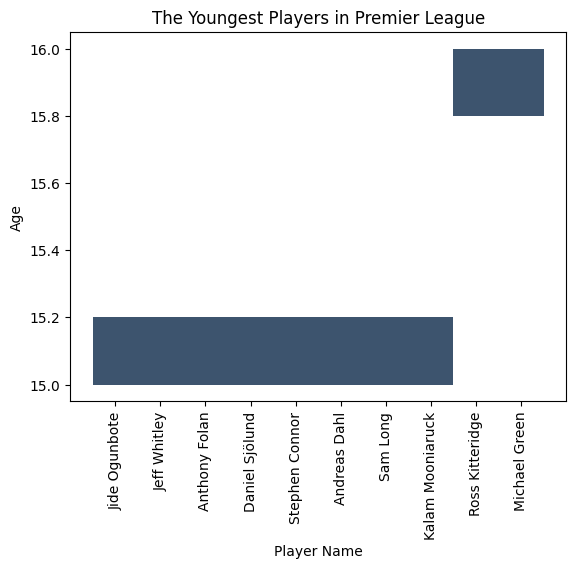

In [ ]:
df_youngest_players = df.groupby('player_name', as_index=False)['age'].min().sort_values('age', ascending=True).head(10)

sns.histplot(data=df_youngest_players, x='player_name', y='age', kde=True)
plt.title('The Youngest Players in Premier League')
plt.xlabel('Player Name')
plt.ylabel('Age')

plt.xticks(rotation=90)

plt.show()

In [ ]:
# Full info about the youngest players
youngest_players = ['Jide Ogunbote' , 'Jeff Whitley' , 'Anthony Folan' ,'Daniel Sjölund', 'Stephen Connor' , 'Andreas Dahl', 'Sam Long', 'Kalam Mooniaruck', 'Ross Kitteridge', 'Michael Green']
youngest_players = df[df.player_name.isin(youngest_players)]
youngest_players.loc[youngest_players.groupby(['player_name'])['age'].idxmin()]

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
4168,1999,Andreas Dahl,Central Midfield,15,IFK Hässleholm,Coventry City,?,0.000,Winter
977,1994,Anthony Folan,Left Midfield,15,Palace U18,Crystal Palace,-,0.000,Summer
3236,1998,Daniel Sjölund,Defensive Midfield,15,Brommapojkarna,West Ham United,€265Th.,0.265,Summer
1088,1994,Jeff Whitley,Defensive Midfield,15,Man City U18,Man City,-,0.000,Summer
7558,2004,Jide Ogunbote,Right Midfield,15,Fulham U18,Fulham,-,0.000,Summer
3804,1999,Kalam Mooniaruck,attack,15,Norwich,Man Utd,?,0.000,Summer
5317,2001,Michael Green,Right-Back,16,Southampton U18,Southampton,-,0.000,Summer
9498,2006,Ross Kitteridge,Goalkeeper,16,Arsenal U18,Reading,free transfer,0.000,Summer
9299,2006,Sam Long,Right-Back,15,Charlton U18,Charlton Athletic,-,0.000,Summer
7802,2004,Stephen Connor,Centre-Forward,15,Everton U18,Everton,-,0.000,Summer


**Let's see what are the favourite positions in the transfer window**

In [ ]:
get_count('position' , 'Most of Positions transferred', 0)

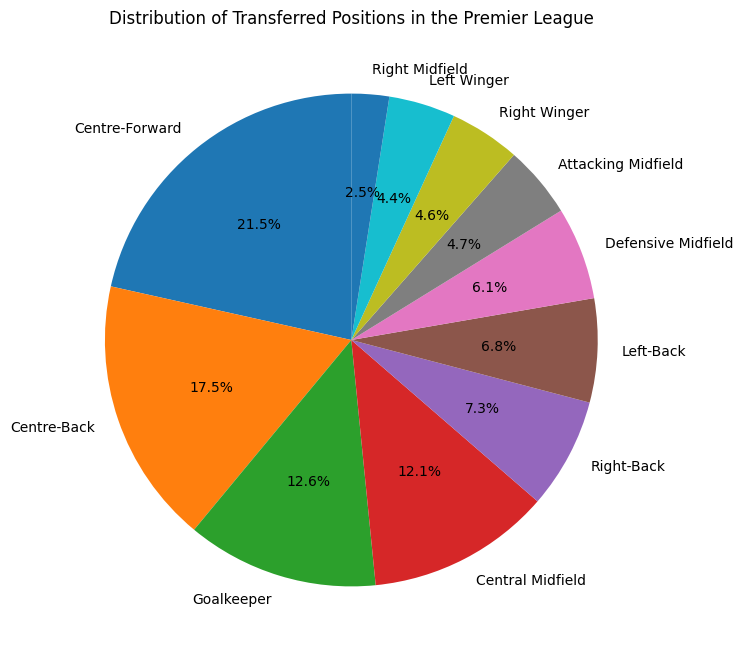

In [ ]:
def get_count(column, title, top_n):
    position_counts = df[column].value_counts().head(top_n)

    plt.figure(figsize=(8, 8))
    plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

get_count('position', 'Distribution of Transferred Positions in the Premier League', 11)

In [ ]:
def get_count_of_position(position = str , top = bool):
    if top == True:
        d = pd.DataFrame(df[df.position == position]['player_name'].value_counts().head(10))
        d = d.reset_index()
        d = d.rename(columns={'index' : 'Player Name' , 'player_name' : 'No. of Transfer'})
        d.sort_values('No. of Transfer', ascending=False)
        fig = px.bar(data_frame=d, x='Player Name', y='No. of Transfer', text_auto=True)
        fig.update_traces(marker_color='rgb(120,18,200)', marker_line_color='rgb(0,0,0)',
                    marker_line_width=1.5, opacity=0.6)
        return fig.update_layout(title= 'Most {} Players transferred'.format(position), title_x= 0.5)
    else:
        d = pd.DataFrame(df[df.position == position]['player_name'].value_counts().tail(10))
        d = d.reset_index()
        d = d.rename(columns={'index' : 'Player Name' , 'player_name' : 'No. of Transfer'})
        return df[df.player_name.isin(d['Player Name'])]

In [ ]:
get_count_of_position('Centre-Forward' , True)

In [ ]:
get_count_of_position('Centre-Back' , True)

In [ ]:
# Fewest CF Players transferred
get_count_of_position('Centre-Forward' , False)

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
8654,2005,Neil Teggart,Centre-Forward,20,Sunderland AFC,Perth Glory,free transfer,0.00,Summer
9524,2006,Colin Kazim-Richards,Centre-Forward,20,Brighton,Sheffield United,€1.50m,1.50,Summer
9528,2006,Christian Nadé,Centre-Forward,21,Troyes,Sheffield United,free transfer,0.00,Summer
9543,2006,Luke Beckett,Centre-Forward,29,Sheffield United,Huddersfield,free transfer,0.00,Summer
9546,2006,Bruce Dyer,Centre-Forward,31,Sheffield United,Doncaster,free transfer,0.00,Summer
9560,2006,Tamás Priskin,Centre-Forward,19,ETO Győr,Watford,€1.50m,1.50,Summer
9715,2006,Chris Dickson,Centre-Forward,22,Dulwich Hamlet,Charlton Athletic,€60Th.,0.06,Winter
9883,2006,Haidong Hao,Centre-Forward,36,Sheffield United,CD Blades,free transfer,0.00,Winter
9884,2006,Colin Marrison,Centre-Forward,21,Sheffield United,Hinckley United,free transfer,0.00,Winter
9898,2006,Will Hoskins,Centre-Forward,20,Rotherham,Watford,€1.00m,1.00,Winter


In [ ]:
# Fewest CB Players transferred
get_count_of_position('Centre-Back' , False)

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
2066,1996,Alvin Martin,Centre-Back,37,West Ham United,Leyton Orient,free transfer,0.000,Summer
2091,1996,Claus Lundekvam,Centre-Back,23,Brann,Southampton,€600Th.,0.600,Summer
12290,2009,Ronald Zubar,Centre-Back,23,Marseille,Wolverhampton Wanderers,€3.00m,3.000,Summer
12381,2009,Kevin Okanga-Ajwang,Centre-Back,17,Burnley,Sparta Oborniki,free transfer,0.000,Summer
12547,2009,Leon Cort,Centre-Back,30,Stoke City,Burnley,€1.80m,1.800,Winter
12686,2009,Kevin Long,Centre-Back,19,Cork City,Burnley,€350Th.,0.350,Winter
12710,2010,Ciaran Clark,Centre-Back,20,Aston Villa Res.,Aston Villa,-,0.000,Summer
12729,2010,Craig Cathcart,Centre-Back,21,Man Utd Res.,Blackpool,€625Th.,0.625,Summer
13031,2010,Tom Eckersley,Centre-Back,18,Bolton U18,Bolton Wanderers,-,0.000,Summer
22944,2021,Samir,Centre-Back,27,Udinese Calcio,Watford,€5.00m,5.000,Winter


### **Transfer Fee Distribution**

In [ ]:
d = df[df.fee_cleaned != 0]
px.box(d,x='fee_cleaned' , title= 'Transfer Fee Amount')

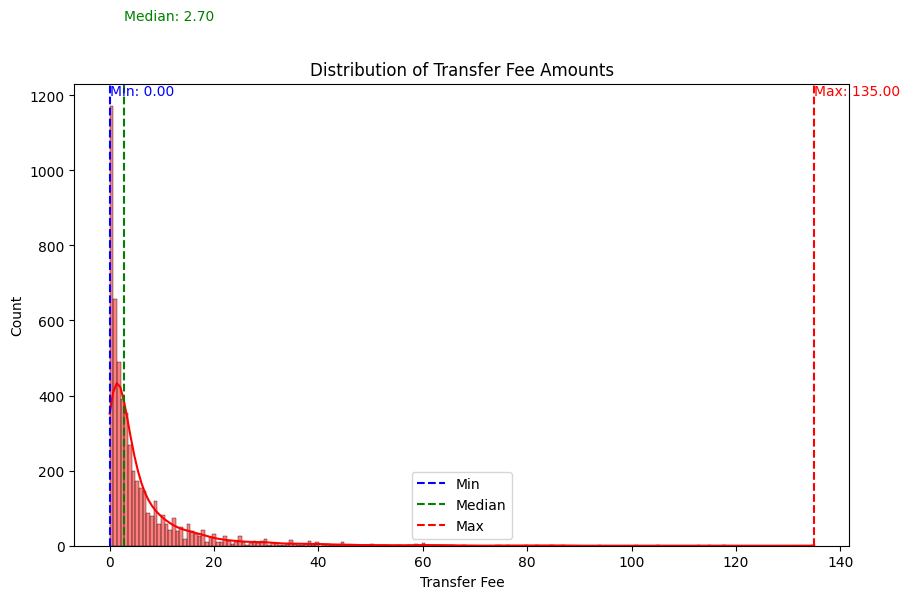

In [ ]:
d = df[df.fee_cleaned != 0]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=d, x='fee_cleaned', kde=True, color='red')
plt.axvline(d.fee_cleaned.min(), color='b', linestyle='--', label='Min')
plt.axvline(d.fee_cleaned.median(), color='g', linestyle='--', label='Median')
plt.axvline(d.fee_cleaned.max(), color='r', linestyle='--', label='Max')

# Add text annotations
plt.text(d.fee_cleaned.min(), 1200, f"Min: {d.fee_cleaned.min():.2f}", color='b')
plt.text(d.fee_cleaned.median(), 1400, f"Median: {d.fee_cleaned.median():.2f}", color='g')
plt.text(d.fee_cleaned.max(), 1200, f"Max: {d.fee_cleaned.max():.2f}", color='r')

plt.title('Distribution of Transfer Fee Amounts')
plt.xlabel('Transfer Fee')
plt.ylabel('Count')

plt.legend()

plt.show()

**Transfer Fee Distribution since 2012**

In [ ]:
df2= df.loc[(df['year']>=2012)]
df2.head(5)

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
14640,2012,Eden Hazard,Left Winger,21,LOSC Lille,Chelsea,€35.00m,35.0,Summer
14641,2012,Oscar,Attacking Midfield,20,Internacional,Chelsea,€32.00m,32.0,Summer
14642,2012,Victor Moses,Right Midfield,21,Wigan,Chelsea,€11.50m,11.5,Summer
14643,2012,César Azpilicueta,Right-Back,22,Marseille,Chelsea,€8.80m,8.8,Summer
14644,2012,Marko Marin,Attacking Midfield,23,Werder Bremen,Chelsea,€8.00m,8.0,Summer


In [ ]:
d = df2[df2.fee_cleaned != 0]
px.box(d,x='fee_cleaned' , title= 'Transfer Fee Amount Since 2012')

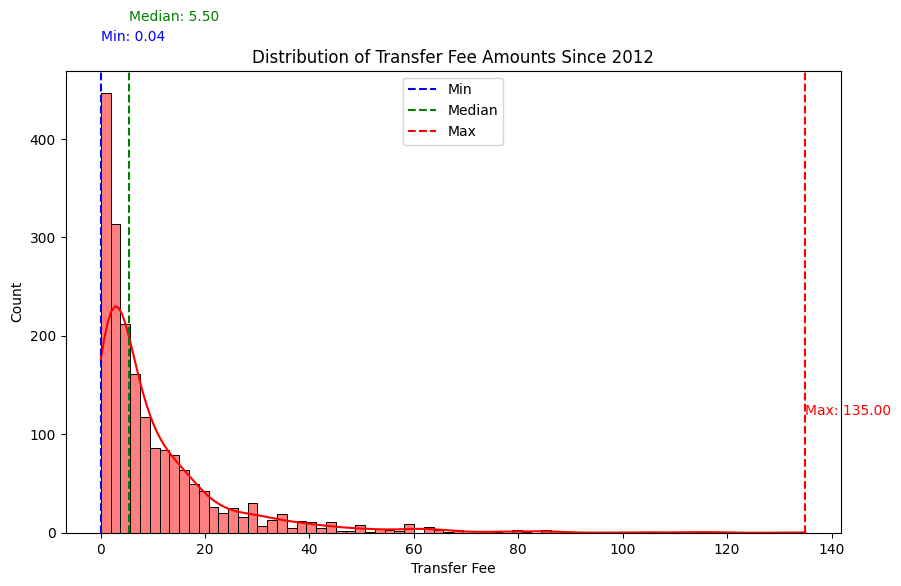

In [ ]:
d = df2[df2.fee_cleaned != 0]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=d, x='fee_cleaned', kde=True, color='red')
plt.axvline(d.fee_cleaned.min(), color='b', linestyle='--', label='Min')
plt.axvline(d.fee_cleaned.median(), color='g', linestyle='--', label='Median')
plt.axvline(d.fee_cleaned.max(), color='r', linestyle='--', label='Max')

# Add text annotations
plt.text(d.fee_cleaned.min(), 500, f"Min: {d.fee_cleaned.min():.2f}", color='b')
plt.text(d.fee_cleaned.median(), 520, f"Median: {d.fee_cleaned.median():.2f}", color='g')
plt.text(d.fee_cleaned.max(), 120, f"Max: {d.fee_cleaned.max():.2f}", color='r')

plt.title('Distribution of Transfer Fee Amounts Since 2012')
plt.xlabel('Transfer Fee')
plt.ylabel('Count')

plt.legend()

plt.show()

**Transfer Fee Distribution since 2017**

In [ ]:
df3= df.loc[(df['year']>=2017)]
df3.head(5)

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
19341,2017,Álvaro Morata,Centre-Forward,24,Real Madrid,Chelsea,€66.00m,66.0,Summer
19342,2017,Tiemoué Bakayoko,Defensive Midfield,22,Monaco,Chelsea,€40.00m,40.0,Summer
19343,2017,Danny Drinkwater,Central Midfield,27,Leicester,Chelsea,€37.90m,37.9,Summer
19344,2017,Antonio Rüdiger,Centre-Back,24,AS Roma,Chelsea,€35.00m,35.0,Summer
19345,2017,Davide Zappacosta,Right-Back,25,Torino,Chelsea,€25.00m,25.0,Summer


In [ ]:
d = df3[df3.fee_cleaned != 0]
px.box(d,x='fee_cleaned' , title= 'Transfer Fee Amount Since 2017')

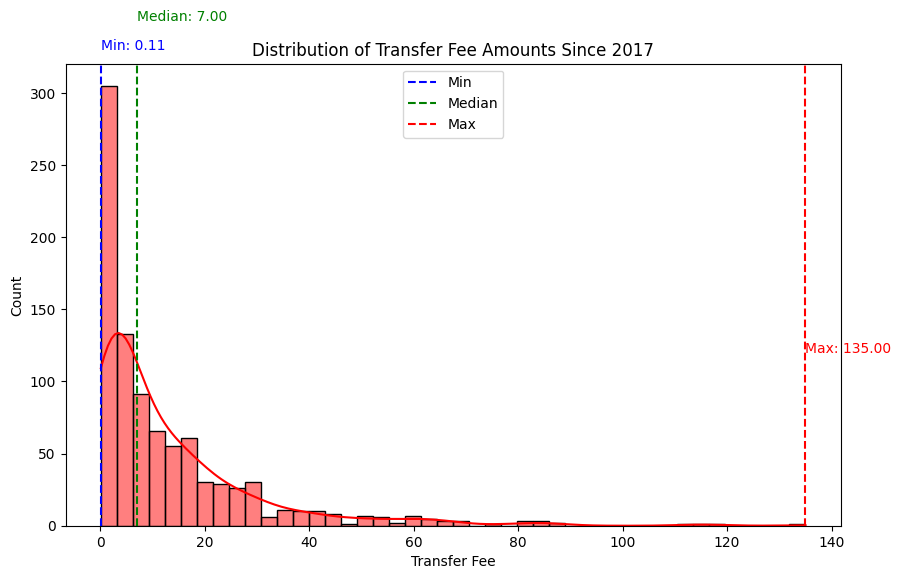

In [ ]:
d = df3[df3.fee_cleaned != 0]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=d, x='fee_cleaned', kde=True, color='red')
plt.axvline(d.fee_cleaned.min(), color='b', linestyle='--', label='Min')
plt.axvline(d.fee_cleaned.median(), color='g', linestyle='--', label='Median')
plt.axvline(d.fee_cleaned.max(), color='r', linestyle='--', label='Max')

# Add text annotations
plt.text(d.fee_cleaned.min(), 330, f"Min: {d.fee_cleaned.min():.2f}", color='b')
plt.text(d.fee_cleaned.median(), 350, f"Median: {d.fee_cleaned.median():.2f}", color='g')
plt.text(d.fee_cleaned.max(), 120, f"Max: {d.fee_cleaned.max():.2f}", color='r')

plt.title('Distribution of Transfer Fee Amounts Since 2017')
plt.xlabel('Transfer Fee')
plt.ylabel('Count')

plt.legend()

plt.show()

In [ ]:
# Top 10 players transferred with high amount
df.sort_values('fee_cleaned' , ascending=False).drop_duplicates(subset = 'player_name').head(10)

,joined,player_name,age,position,left,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,club
19969,Barcelona,Philippe Coutinho,25.0,Left Winger,Liverpool,€135.00m,out,Winter,135.00,Premier League,2017,2017/2018,Liverpool FC
22330,Man City,Jack Grealish,25.0,Left Winger,Aston Villa,€117.50m,out,Summer,117.50,Premier League,2021,2021/2022,Aston Villa
20957,Real Madrid,Eden Hazard,28.0,Left Winger,Chelsea,€115.00m,out,Summer,115.00,Premier League,2019,2019/2020,Chelsea FC
22411,Chelsea,Romelu Lukaku,28.0,Centre-Forward,Inter,€113.00m,in,Summer,113.00,Premier League,2021,2021/2022,Chelsea FC
18674,Manchester United,Paul Pogba,23.0,Central Midfield,Juventus,€105.00m,in,Summer,105.00,Premier League,2016,2016/2017,Manchester United
15752,Real Madrid,Gareth Bale,24.0,Right Winger,Tottenham Hotspur,€101.00m,out,Summer,101.00,Premier League,2013,2013/2014,Tottenham Hotspur
11778,Real Madrid,Cristiano Ronaldo,24.0,Centre-Forward,Manchester United,€94.00m,out,Summer,94.00,Premier League,2009,2009/2010,Manchester United
21122,Man Utd,Harry Maguire,26.0,Centre-Back,Leicester City,€87.00m,out,Summer,87.00,Premier League,2019,2019/2020,Leicester City
22586,Manchester United,Jadon Sancho,21.0,Left Winger,Bor. Dortmund,€85.00m,in,Summer,85.00,Premier League,2021,2021/2022,Manchester United
19968,Liverpool,Virgil van Dijk,26.0,Centre-Back,Southampton,€84.65m,in,Winter,84.65,Premier League,2017,2017/2018,Liverpool FC


In [ ]:
get_count('year' , 'Transfers per season', 0)

In [ ]:
df.head()

,year,player_name,position,age,left,joined,fee,fee_cleaned,transfer_period
0,1992,Tommy Wright,Left Winger,26,Leicester,Middlesbrough,€910Th.,0.91,Summer
1,1992,Jonathan Gittens,defence,28,Southampton,Middlesbrough,€250Th.,0.25,Summer
2,1992,Chris Morris,Right-Back,28,Celtic,Middlesbrough,?,0.00,Summer
3,1992,Ben Roberts,Goalkeeper,17,Boro U18,Middlesbrough,-,0.00,Summer
4,1992,Andy Todd,Centre-Back,17,Boro U18,Middlesbrough,-,0.00,Summer


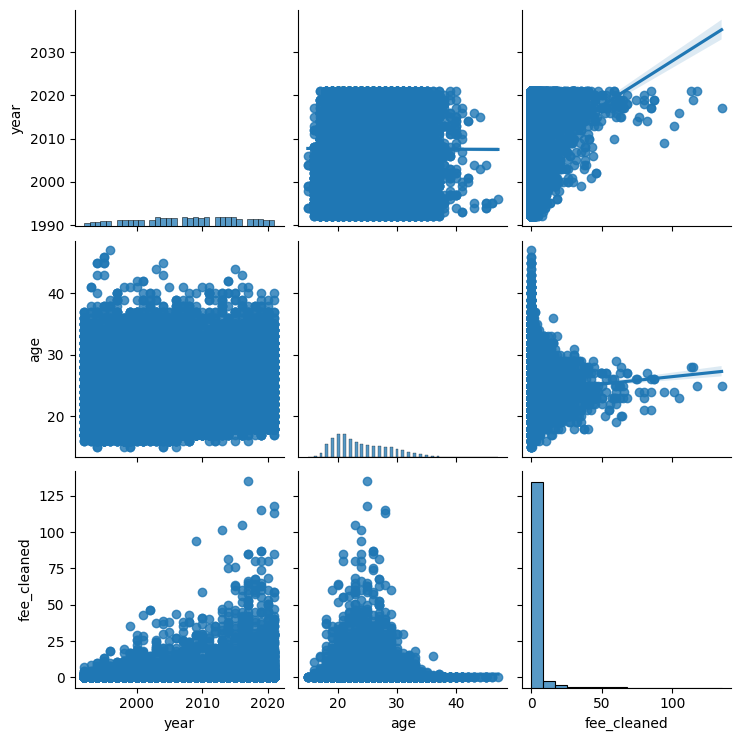

In [ ]:
sns.pairplot(df , kind='reg');

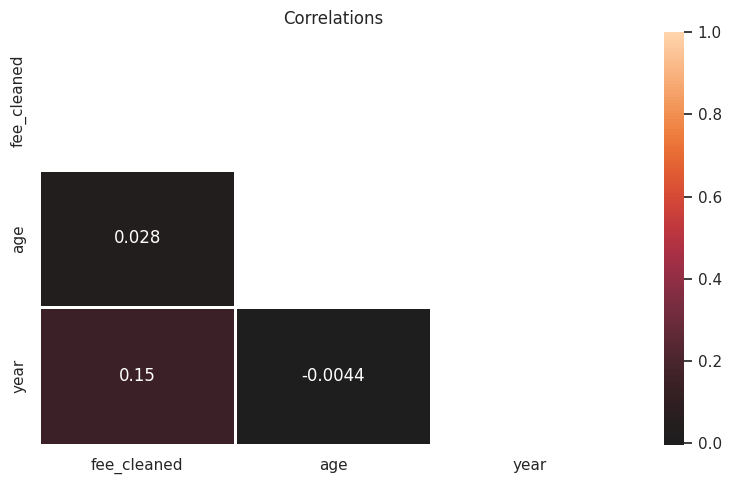

In [ ]:
sns.set(style="white")
plt.figure(figsize=(8,5))
corr = df[['fee_cleaned','age' , 'year']].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0,annot = True, linewidth=2)
plt.title('Correlations')
plt.tight_layout();

# **Referee Insights**

In [ ]:
ref=pd.read_csv('/content/Premier League Referee Statistics.csv')
ref.head()

,Referee,Referee1,Apps,Foulspg,Fouls_Tackles,Penpg,Yelpg,Yel,Redpg,Red,HomeWin%,AwayWin%,Draw%
0,1.0,Anthony Taylor,28.0,19.57,0.59,0.32,3.61,101.0,0.18,5.0,42.9,25.0,32.1
1,2.0,Paul Tierney,27.0,21.67,0.67,0.37,3.81,103.0,0.19,5.0,37.0,37.0,25.9
2,3.0,Mike Dean,26.0,19.23,0.58,0.19,3.15,82.0,0.08,2.0,34.6,34.6,30.8
3,4.0,Martin Atkinson,26.0,15.65,0.51,0.27,2.46,64.0,0.08,2.0,53.8,30.8,15.4
4,5.0,Michael Oliver,26.0,21.19,0.71,0.27,2.88,75.0,0.27,7.0,53.8,26.9,19.2


In [ ]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Referee        22 non-null     float64
 1   Referee1       22 non-null     object 
 2   Apps           22 non-null     float64
 3   Foulspg        22 non-null     float64
 4   Fouls_Tackles  22 non-null     float64
 5   Penpg          22 non-null     float64
 6   Yelpg          22 non-null     float64
 7   Yel            22 non-null     float64
 8   Redpg          22 non-null     float64
 9   Red            22 non-null     float64
 10  HomeWin%       22 non-null     float64
 11  AwayWin%       22 non-null     float64
 12  Draw%          22 non-null     float64
dtypes: float64(12), object(1)
memory usage: 2.5+ KB


We find the Referees with the most appearances. This can mean that the FA views them as more reliant than their other counterparts.

Anthony Taylor (28) is the leading appearance maker followed by Paul Tierney, Mike Dean and Martin Atkinson

In [ ]:
# Sort the DataFrame by the 'Apps' column in descending order
sorted_ref = ref.sort_values(by='Apps', ascending=False)

# Select the referees with the most appearances
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Apps',
             labels={'Referee1': 'Referee', 'Apps': 'Number of Appearances'},
             title='Referees with the Most Appearances in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

David Coote is most likely to call a foul followed by Andy Madley and Michael Salisbury. All of whom are below 40 years of age, maybe age has a correlation to the number of fouls called in a match.

In [ ]:
sorted_ref = ref.sort_values(by='Foulspg', ascending=False)

# Select the referees with the most appearances
foul_referees = sorted_ref.head(10)
# Create a bar graph using Plotly Express
fig = px.bar(foul_referees, x='Referee1', y='Foulspg',
             labels={'Referee1': 'Referee', 'Foulspg': 'Fouls per Game'},
             title='Average Fouls per Game Awarded by Premier League Referees')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

In [ ]:
# Calculate the total number of bookings (sum of yellow cards and red cards per match)
ref['Bookings'] = ref['Yelpg'] + ref['Redpg']

# Sort the DataFrame by the 'Bookings' column in descending order
sorted_ref = ref.sort_values(by='Bookings', ascending=False)

# Select the referees with the highest number of bookings per match
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Bookings',
             labels={'Referee1': 'Referee', 'Bookings': 'Total Bookings'},
             title='Referees with the Highest Number of Bookings per Match in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

**Michael Oliver** has a significantly higher Red Cards per game %. Hence someone you wouldn't want to mess with!

In [ ]:
sorted_ref = ref.sort_values(by='Redpg', ascending=False)

# Select the referees with the highest number of red cards per match
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Redpg',
             labels={'Referee1': 'Referee', 'Redpg': 'Red Cards per Game'},
             title='Referees with the Highest Number of Red Cards per Game in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

**Number of Fouls committed per booking**
A higher number would point towards a more lenient referee while a lower number might indicate a stricter one

In [ ]:
# Calculate the number of fouls committed per booking
ref['Fouls_per_Booking'] = ref['Foulspg'] / (ref['Yelpg'] + ref['Redpg'])

# Sort the DataFrame by the 'Fouls_per_Booking' column in descending order
sorted_ref = ref.sort_values(by='Fouls_per_Booking', ascending=False)

# Select the referees with the highest number of fouls committed per booking
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Fouls_per_Booking',
             labels={'Referee1': 'Referee', 'Fouls_per_Booking': 'Fouls per Booking'},
             title='Referees with the Highest Number of Fouls per Booking in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

**Andy Madley** appears to keep his cards in pocket and allows almost 10 bookings before showing one. Hence he's your ref while giving away tactical fouls

In [ ]:
# Sort the DataFrame by the 'Fouls_per_Booking' column in ascending order
sorted_ref = ref.sort_values(by='Fouls_per_Booking', ascending=True)

# Select the referees with the highest number of fouls committed per booking
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Fouls_per_Booking',
             labels={'Referee1': 'Referee', 'Fouls_per_Booking': 'Fouls per Booking'},
             title='Referees with the Lowest Number of Fouls per Booking in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

**John Brooks** appears to flash his cards a lot more often. Booking a player on every 4th foul committed.

**Referees most likely to award Penalties**

**Darren England** has a significantly highest Penpg rate. Awarding one every other game

In [ ]:
# Sort the DataFrame by the 'Penpg' column in descending order
sorted_ref = ref.sort_values(by='Penpg', ascending=False)

# Select the referees who are most likely to award penalties
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Penpg',
             labels={'Referee1': 'Referee', 'Penpg': 'Penalties per Game'},
             title='Referees Most Likely to Award Penalties in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

In [ ]:
# Sort the DataFrame by the 'HomeWin%' column in descending order
sorted_ref = ref.sort_values(by='HomeWin%', ascending=False)

# Select the referees with the highest win percentage
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='HomeWin%',
             labels={'Referee1': 'Referee', 'HomeWin%': 'Win Percentage'},
             title='Referees with the Highest Home Win Percentage in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

In [ ]:
# Sort the DataFrame by the 'HomeWin%' column in descending order
sorted_ref = ref.sort_values(by='HomeWin%', ascending=True)

# Select the referees with the highest win percentage
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='HomeWin%',
             labels={'Referee1': 'Referee', 'HomeWin%': 'Win Percentage'},
             title='Referees with the Lowest Home Win Percentage in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

So, you don't want **Robert Jones** refereeing your team at home

In [ ]:
# Sort the DataFrame by the 'Draw%' column in descending order
sorted_ref = ref.sort_values(by='Draw%', ascending=False)

# Select the referees who have played the most draws
top_referees = sorted_ref.head(10)  # Adjust the number as per your preference

# Create a bar graph using Plotly Express
fig = px.bar(top_referees, x='Referee1', y='Draw%',
             labels={'Referee1': 'Referee', 'Draw%': 'Draw Percentage'},
             title='Referees with the Most Draws in the Premier League')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the bar graph
fig.show()

## **Scouting Players using FM 2017 data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

import matplotlib
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib.colors import ListedColormap

from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import MultiTaskElasticNet

In [ ]:
pl=pd.read_csv('/content/dataset.csv')
pl.head()

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0,0,0,178,...,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0,0,0,188,...,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0,0,0,183,...,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0,0,0,170,...,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0,0,0,181,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
pl.columns

Index(['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional',

In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159541 entries, 0 to 159540
Data columns (total 89 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   UID                  159541 non-null  int64 
 1   Name                 159541 non-null  object
 2   NationID             159541 non-null  int64 
 3   Born                 159541 non-null  object
 4   Age                  159541 non-null  int64 
 5   IntCaps              159541 non-null  int64 
 6   IntGoals             159541 non-null  int64 
 7   U21Caps              159541 non-null  int64 
 8   U21Goals             159541 non-null  int64 
 9   Height               159541 non-null  int64 
 10  Weight               159541 non-null  int64 
 11  AerialAbility        159541 non-null  int64 
 12  CommandOfArea        159541 non-null  int64 
 13  Communication        159541 non-null  int64 
 14  Eccentricity         159541 non-null  int64 
 15  Handling             159541 non-nu

In [ ]:
pl['Age'].describe()

count    159541.000000
mean         23.578033
std           5.640172
min          14.000000
25%          19.000000
50%          23.000000
75%          27.000000
max          54.000000
Name: Age, dtype: float64

We observe that 50% of the players are <=23 years old.
And for our **Scouting purpose**, this is the age category we will be targetting

In [ ]:
pl['Age'].isna().unique()

array([False])

Some mental attributes are removed, because they are not really that important for predicting a player's position and are not even visible in the game itself.

In [ ]:
players = pl.drop(['Name', 'NationID', 'Born', 'IntCaps', 'IntGoals', 'U21Caps', 'U21Goals', 'PositionsDesc',
                   'Consistency', 'Dirtiness', 'ImportantMatches', 'Versatility', 'Adaptability', 'Ambition',
                   'Loyalty', 'Pressure', 'Professional', 'Sportsmanship', 'Temperament', 'Controversy',
                   'Age', 'Weight', 'Height', 'InjuryProness'
            ], axis=1)
players.head()

,UID,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,1,1,2,2,3,3,1,4,1,...,1,1,1,1,20,11,1,1,1,1
1,1000331,12,3,5,1,12,6,2,1,6,...,1,1,1,1,1,1,1,1,1,1
2,1000334,1,2,4,2,1,1,1,3,3,...,1,1,1,1,20,1,1,1,1,1
3,1000337,1,3,1,3,2,2,1,2,3,...,1,1,1,1,1,1,1,1,1,1
4,1000340,3,3,2,3,1,1,3,3,2,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
X = players.loc[:,:'Strength'].drop(['RightFoot', 'LeftFoot'], axis=1)
X_foot = players.loc[:, ['RightFoot', 'LeftFoot']]
y = players.loc[:,'Goalkeeper':]

In [ ]:
X.head(3)

,UID,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,...,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,NaturalFitness,Pace,Stamina,Strength
0,1000055,1,1,2,2,3,3,1,4,1,...,5,12,9,7,7,11,12,6,5,12
1,1000331,12,3,5,1,12,6,2,1,6,...,3,2,5,13,5,9,5,8,1,7
2,1000334,1,2,4,2,1,1,1,3,3,...,6,9,7,4,4,8,8,6,4,9


In [ ]:
X_foot.head(3)

,RightFoot,LeftFoot
0,20,12
1,20,11
2,20,5


In [ ]:
y.head(3)

,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1,1,1,1,1,1,1,1,1,20,11,1,1,1,1
1,20,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,20,1,1,1,1,1


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
vectors = X.values
scaled_rows = scaler.fit_transform(vectors.T).T
X_normalized = pd.DataFrame(data = scaled_rows, columns = X.columns)

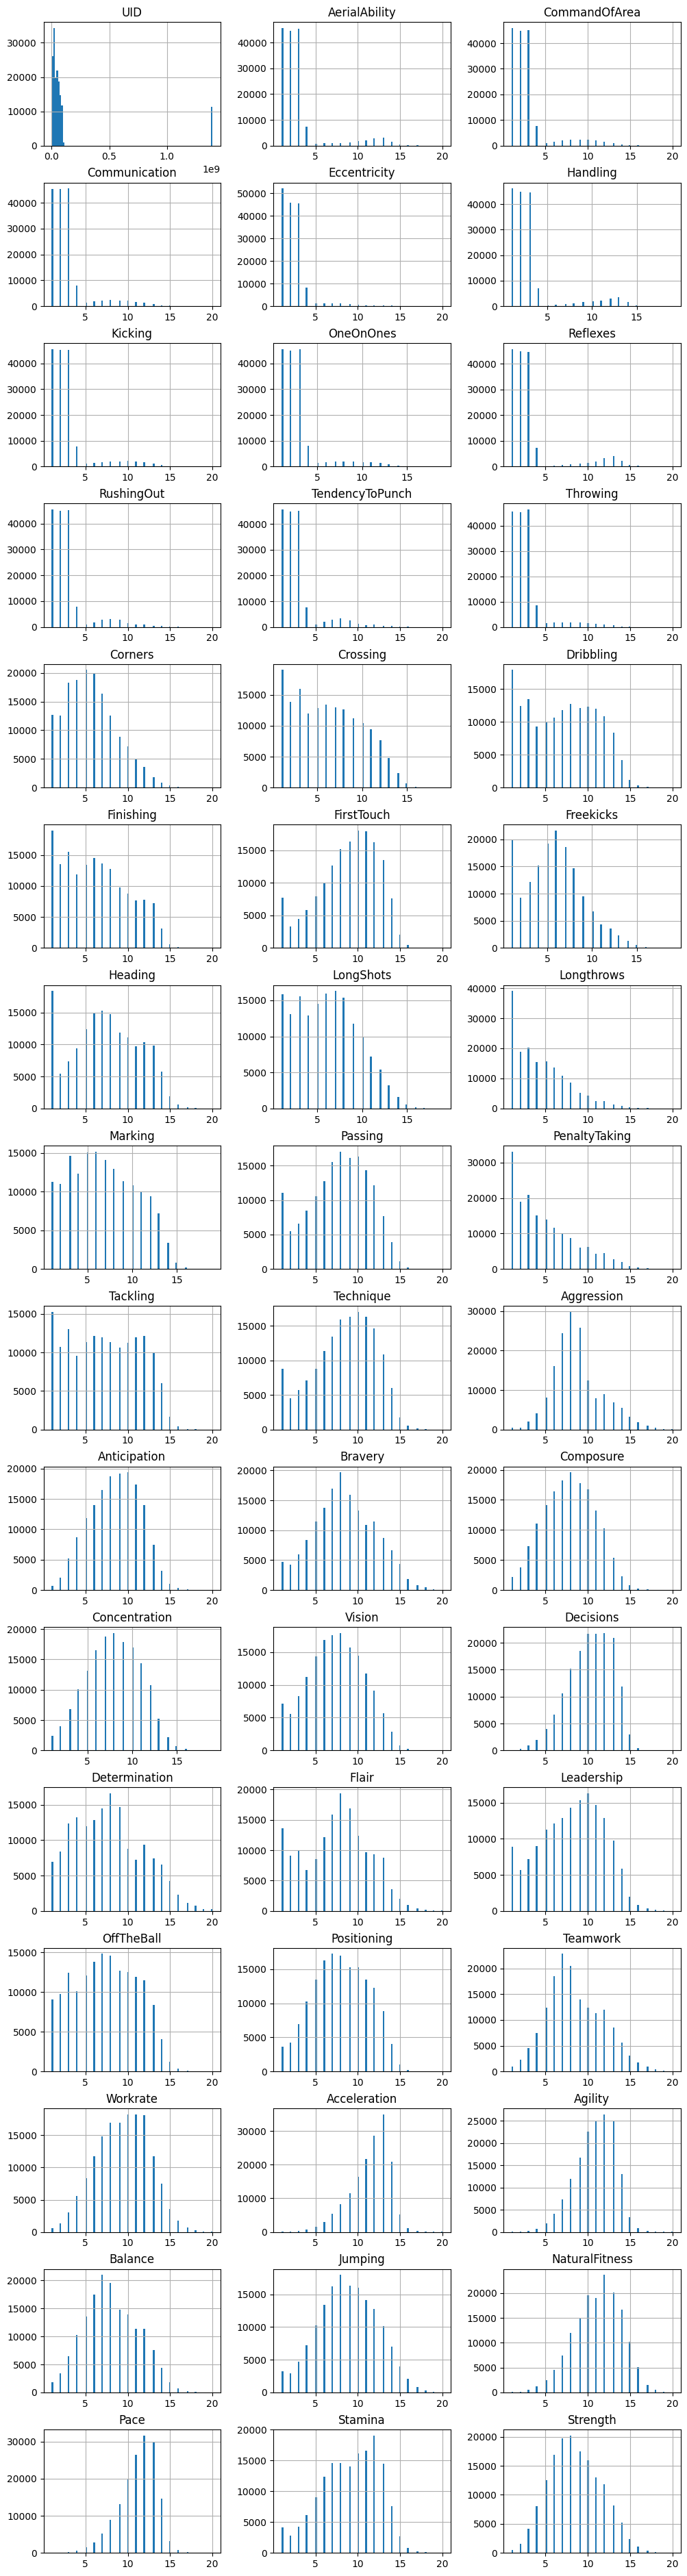

In [ ]:
fig, axes = plt.subplots(len(X_normalized.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X.hist(column = X_normalized.columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
for col in y.columns.unique():
    print(col, y[col][y[col] == 20].count())

Goalkeeper 17130
Sweeper 254
Striker 26621
AttackingMidCentral 12010
AttackingMidLeft 8051
AttackingMidRight 9191
DefenderCentral 27437
DefenderLeft 10915
DefenderRight 11967
DefensiveMidfielder 11807
MidfielderCentral 20688
MidfielderLeft 5463
MidfielderRight 5922
WingBackLeft 1377
WingBackRight 1094


In [ ]:
XGRegModel = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))
cv_results_XGRegModel = cross_validate(XGRegModel, X, y, cv=5, verbose=1)
plt.plot(cv_results_XGRegModel['test_score'])

KeyboardInterrupt: ignored

In [ ]:
XGRegModel.fit(X, y)

In [ ]:
NNetModel = Sequential()

NNetModel.add(Dense(len(X.columns), activation='relu', input_dim=len(X.columns)))
NNetModel.add(BatchNormalization())
NNetModel.add(Dropout(0.2))
NNetModel.add(Dense((len(X.columns) + len(y.columns)) // 2, activation='relu'))
NNetModel.add(Flatten())
NNetModel.add(Dense(len(y.columns), activation='relu'))

NNetModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae'])

NNetModel.fit(X.values, y.values, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

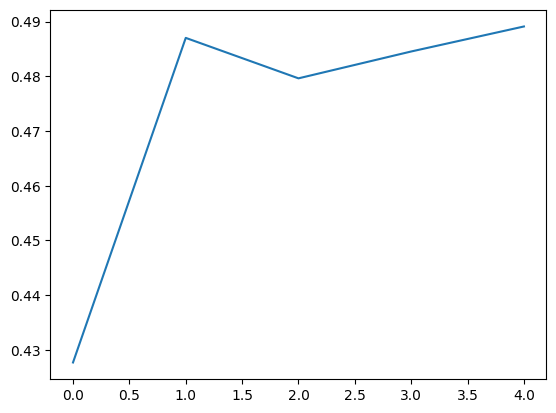

In [ ]:
RFRegModel = RandomForestRegressor()
cv_results_RFRegModel = cross_validate(RFRegModel, X, y, cv=5, verbose=1)
plt.plot(cv_results_RFRegModel['test_score'])

In [ ]:
RFRegModel.fit(X, y)

RandomForestRegressor()

In [ ]:
elastic_net = MultiTaskElasticNet()
param_grid = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': np.arange(0.1, 1.1, 0.1)
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
elastic_net = MultiTaskElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
cv_results = cross_validate(elastic_net, X, y, cv=5, verbose=1)
plt.plot(cv_results['test_score'])

In [ ]:
elastic_net.fit(X, y)

In [ ]:
def predict_player_position(UID, model):
    player_id = UID

    positions = model.predict(X.loc[[player_id]])[0]

    R_scaler = preprocessing.MinMaxScaler(feature_range=(1, 20))
    vectors = pd.DataFrame(positions.reshape(1,15), columns=y.columns).values
    scaled_rows = R_scaler.fit_transform(vectors.T).T

    results = pd.DataFrame({'Position':y.columns, 'Real':y.loc[player_id], 'Predicted':scaled_rows[0], 'Difference':y.loc[player_id]-scaled_rows[0]})
    results.sort_values('Real', ascending=False)

    mae = abs(results['Difference']).median()
    r2 = r2_score(y.loc[player_id], scaled_rows[0])

    return results, mae, r2

In [ ]:
def draw_positions(results, p_name=''):

    fig, ax = plt.subplots(1,2)

    x_coords = [10,10,10,10,-45,65,10,-45,65,10,10,-45,65,-45,65]
    y_coords = [-85,-55,95,65,65,65,-25,-25,-25,5,35,35,35,5,5]
    size = [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
    patches = []
    for x1,y1,r in zip(x_coords, y_coords, size):
        circle = Circle((x1,y1), r)
        patches.append(circle)

    colors1 = results['Predicted']
    colors2 = results['Real']
    newcmp = ListedColormap(['red', 'orange', 'yellow', 'green'])
    p1 = PatchCollection(patches, cmap=newcmp, alpha=1)
    p2 = PatchCollection(patches, cmap=newcmp, alpha=1)
    p1.set_array(colors1)
    p2.set_array(colors2)

    ax[0].set_ylim((-110,120))
    ax[0].set_xlim((-70,90))
    ax[0].add_collection(p1)
    ax[0].set_title('Predicted')

    ax[1].set_ylim((-110,120))
    ax[1].set_xlim((-70,90))
    ax[1].add_collection(p2)
    ax[1].set_title('Real')

    fig.suptitle(p_name)

In [ ]:
# to see where mistakes were made:
def show_predictions(predicted_pos, true_pos):
    return pred_test_table[pred_test_table['True_position'] == true_pos][pred_test_table[pred_test_table['True_position'] == true_pos]['Pred_position'] == predicted_pos]

# to get specific attributes using player UID:
def get_attribute(UID, attribute):
    return pl[pl.index == UID][attribute].tolist()[0]

# to get data using names:
def search_by_name(name):
    return pl[pl['Name'].str.contains(name)]

In [ ]:
# to get attributes for FM-like shapes for players:
def get_shape_attributes(UID):
    shape_attributes = {}
    shape_attributes['Speed'] = (get_attribute(UID, 'Acceleration') + get_attribute(UID, 'Pace')) + get_attribute(UID, 'Agility')/ 3
    shape_attributes['Physical'] = (get_attribute(UID, 'Agility') + get_attribute(UID, 'Balance') + get_attribute(UID, 'NaturalFitness')
                    + get_attribute(UID, 'Stamina') + get_attribute(UID, 'Strength') + get_attribute(UID, 'Workrate')) / 6
    shape_attributes['Defence'] = (get_attribute(UID, 'Tackling') + get_attribute(UID, 'Marking') + get_attribute(UID, 'Positioning')) / 3
    shape_attributes['Mental'] = (get_attribute(UID, 'Anticipation') + get_attribute(UID, 'Bravery') + get_attribute(UID, 'Aggression')
                + get_attribute(UID, 'Concentration') + get_attribute(UID, 'Decisions') + get_attribute(UID, 'Determination') + get_attribute(UID, 'Teamwork')) / 7
    shape_attributes['Aerial'] = (get_attribute(UID, 'Heading') + get_attribute(UID, 'Jumping') + get_attribute(UID, 'AerialAbility')) / 3
    shape_attributes['Technique'] = (get_attribute(UID, 'Dribbling') + get_attribute(UID, 'FirstTouch') + get_attribute(UID, 'Technique')) / 3
    shape_attributes['Attack'] = (get_attribute(UID, 'Finishing') + get_attribute(UID, 'Composure') + get_attribute(UID, 'OffTheBall') + get_attribute(UID, 'LongShots')) / 4
    shape_attributes['Vision'] = (get_attribute(UID, 'Passing') + get_attribute(UID, 'Flair') + get_attribute(UID, 'Vision') + get_attribute(UID, 'LongShots')) / 4

    return shape_attributes

# same for goalkeepers:
def get_shape_attributes_GK(UID):
    shape_attributes = {}
    shape_attributes['Speed'] = (get_attribute(UID, 'Acceleration') + get_attribute(UID, 'Pace')) + get_attribute(UID, 'Agility')/ 3
    shape_attributes['Physical'] = (get_attribute(UID, 'Agility') + get_attribute(UID, 'Balance') + get_attribute(UID, 'NaturalFitness')
                    + get_attribute(UID, 'Stamina') + get_attribute(UID, 'Strength') + get_attribute(UID, 'Workrate')) / 6
    shape_attributes['ShotStopping'] = (get_attribute(UID, 'Handling') + get_attribute(UID, 'OneOnOnes')
                + get_attribute(UID, 'Reflexes') + get_attribute(UID, 'Positioning')) / 4
    shape_attributes['Distribution'] = (get_attribute(UID, 'FirstTouch') + get_attribute(UID, 'Throwing')) / 2
    shape_attributes['Aerial_GK'] = (get_attribute(UID, 'Jumping') + get_attribute(UID, 'AerialAbility')) / 2
    shape_attributes['Eccentricity'] = (get_attribute(UID, 'Eccentricity'))
    shape_attributes['Communication'] = (get_attribute(UID, 'Communication') + get_attribute(UID, 'RushingOut') + get_attribute(UID, 'CommandOfArea')) / 3
    shape_attributes['Mental'] = (get_attribute(UID, 'Anticipation') + get_attribute(UID, 'Bravery') + get_attribute(UID, 'Aggression')
                + get_attribute(UID, 'Concentration') + get_attribute(UID, 'Decisions') + get_attribute(UID, 'Determination') + get_attribute(UID, 'Teamwork')) / 7

    return shape_attributes

In [ ]:
# to draw FM-like shapes for players:
def draw_shape(UID):
    values_dict = get_shape_attributes(UID)

    labels = np.array(list(values_dict.keys()))
    stats = list(values_dict.values())
    name = get_attribute(UID, 'Name')

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats.append(stats[0])
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_xticks(angles[:-1])  # Exclude the last angle
    ax.set_xticklabels(labels)
    ax.set_title(name)
    ax.set_yticks(np.arange(0, 25, 10))

    plt.show()


# Same for keepers:
def draw_shape_GK(UID):
    values_dict = get_shape_attributes_GK(UID)

    labels = np.array(list(values_dict.keys()))
    stats = list(values_dict.values())
    name = get_attribute(UID, 'Name') + ' - GK'

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats.append(stats[0])
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_xticks(angles[:-1])  # Exclude the last angle
    ax.set_xticklabels(labels)
    ax.set_title(name)
    ax.set_yticks(np.arange(0, 25, 10))

    plt.show()

In [ ]:
# to make a prediction for a player using UID:
def predict_and_show(UID, model, p_name=''):
    results = predict_player_position(UID, model)
    print(results[0])
    print('MAD =', results[1])
    print('R2 score =', results[2])
    draw_positions(results[0], p_name)
    draw_shape(UID)
    draw_shape_GK(UID)

In [ ]:
search_by_name('Mohamed Salah')

In [ ]:
get_attribute(132391, 'Name')

1/1 [==============================] - 0s 23ms/step
                                Position  Real  Predicted  Difference
Goalkeeper                    Goalkeeper     1   8.814891   -7.814891
Sweeper                          Sweeper     1   1.000000    0.000000
Striker                          Striker    20  18.464855    1.535145
AttackingMidCentral  AttackingMidCentral    11  14.103538   -3.103538
AttackingMidLeft        AttackingMidLeft    13  12.660020    0.339980
AttackingMidRight      AttackingMidRight    12  13.376178   -1.376178
DefenderCentral          DefenderCentral     1  18.391926  -17.391926
DefenderLeft                DefenderLeft     1  10.275273   -9.275273
DefenderRight              DefenderRight     1  11.218133  -10.218133
DefensiveMidfielder  DefensiveMidfielder     1  12.643867  -11.643867
MidfielderCentral      MidfielderCentral     1  20.000000  -19.000000
MidfielderLeft            MidfielderLeft     1  10.985790   -9.985790
MidfielderRight          MidfielderRig

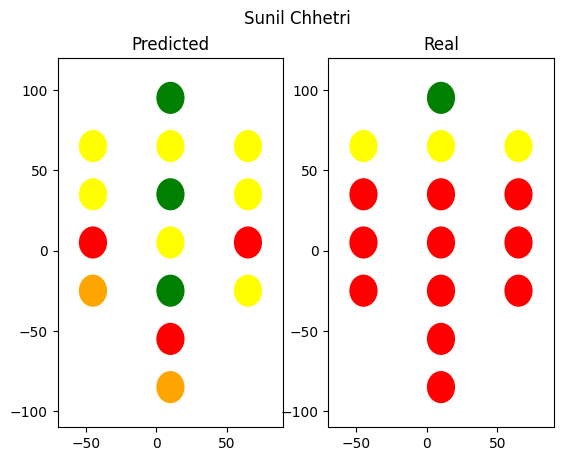

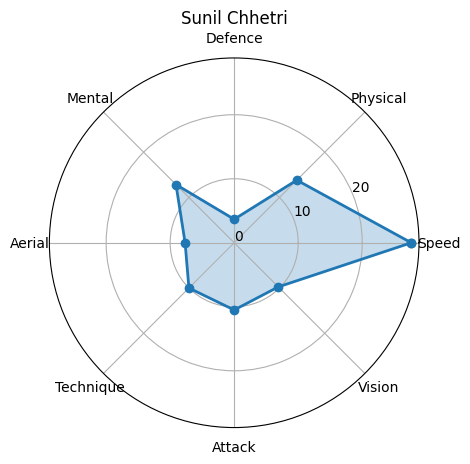

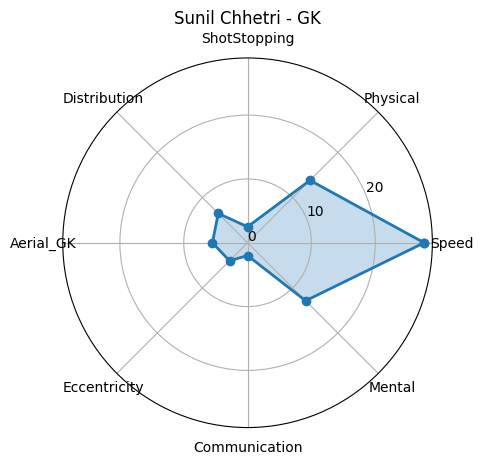

In [ ]:
predict_and_show(132391, NNetModel, 'Sunil Chhetri')

                                Position  Real  Predicted  Difference
Goalkeeper                    Goalkeeper     1   1.718245   -0.718245
Sweeper                          Sweeper     1   1.726042   -0.726042
Striker                          Striker    20  19.999998    0.000002
AttackingMidCentral  AttackingMidCentral    11   9.956039    1.043961
AttackingMidLeft        AttackingMidLeft    13  12.048307    0.951693
AttackingMidRight      AttackingMidRight    12  10.485018    1.514982
DefenderCentral          DefenderCentral     1   1.940502   -0.940502
DefenderLeft                DefenderLeft     1   1.404840   -0.404840
DefenderRight              DefenderRight     1   2.945669   -1.945669
DefensiveMidfielder  DefensiveMidfielder     1   1.000000    0.000000
MidfielderCentral      MidfielderCentral     1   1.811160   -0.811160
MidfielderLeft            MidfielderLeft     1   3.458638   -2.458638
MidfielderRight          MidfielderRight     1   4.086795   -3.086795
WingBackLeft        

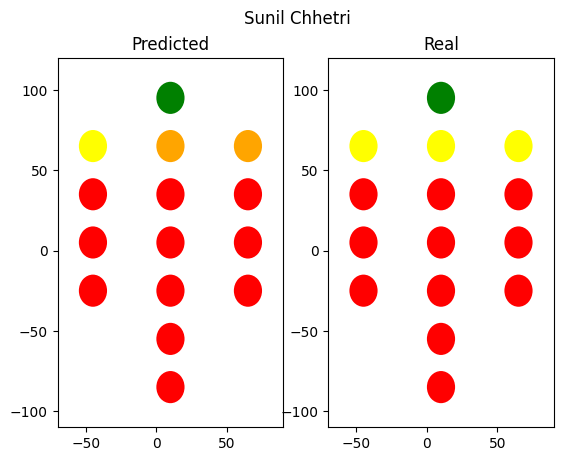

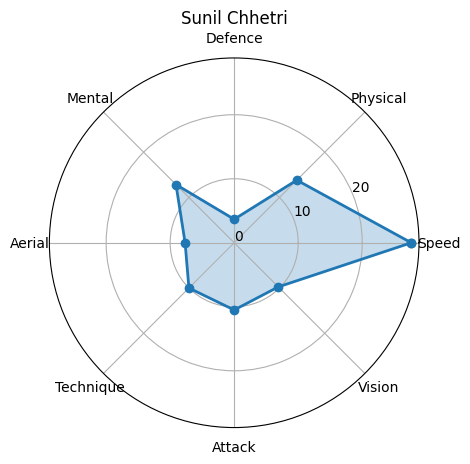

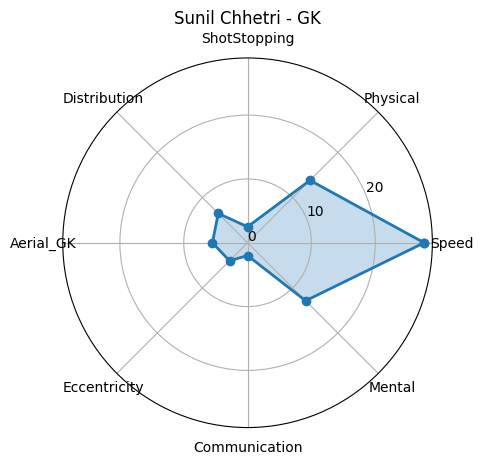

In [ ]:
predict_and_show(132391, XGRegModel, 'Sunil Chhetri')

                                Position  Real  Predicted    Difference
Goalkeeper                    Goalkeeper     1   1.000000  0.000000e+00
Sweeper                          Sweeper     1   1.000000  0.000000e+00
Striker                          Striker    20  20.000000 -3.552714e-15
AttackingMidCentral  AttackingMidCentral    11  10.064034  9.359658e-01
AttackingMidLeft        AttackingMidLeft    13  10.864995  2.135005e+00
AttackingMidRight      AttackingMidRight    12  10.804162  1.195838e+00
DefenderCentral          DefenderCentral     1   1.000000  0.000000e+00
DefenderLeft                DefenderLeft     1   1.040555 -4.055496e-02
DefenderRight              DefenderRight     1   1.060832 -6.083244e-02
DefensiveMidfielder  DefensiveMidfielder     1   1.000000  0.000000e+00
MidfielderCentral      MidfielderCentral     1   1.395411 -3.954109e-01
MidfielderLeft            MidfielderLeft     1   2.094984 -1.094984e+00
MidfielderRight          MidfielderRight     1   2.338314 -1.338

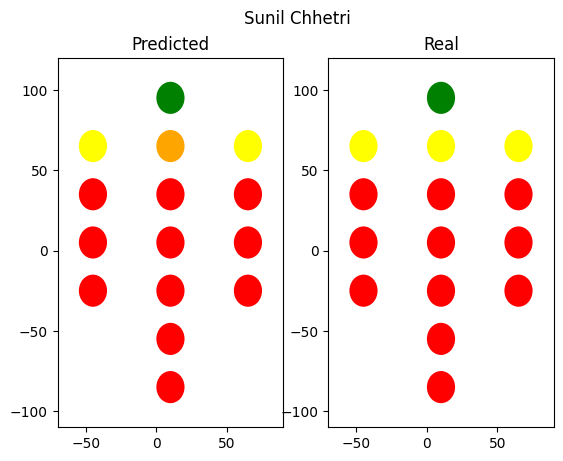

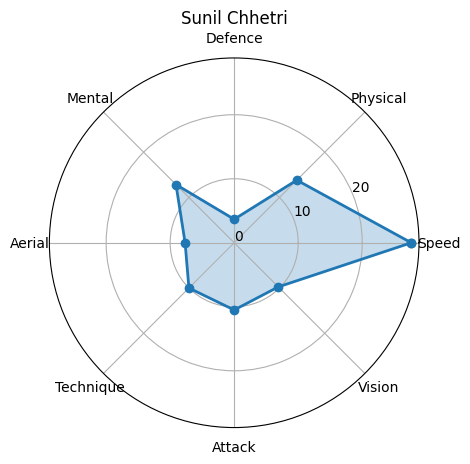

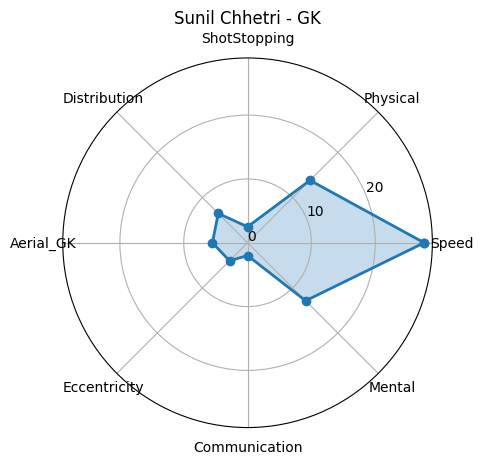

In [ ]:
predict_and_show(132391, RFRegModel, 'Sunil Chhetri')

In [ ]:
predict_and_show(132391, elastic_net, 'Sunil Chhetri')